#Import essential Libraries

In [1]:
import pandas as pd
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing,metrics 

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/atanuc73/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

# Loading data into pandas dataframe and print details of data 

In [2]:
train_raw    = pd.read_csv('train_s3TEQDk.csv')
test_raw     = pd.read_csv('test_mSzZ8RL.csv')
sub          = pd.read_csv('sample_submission_eyYijxG.csv')

In [3]:
train_raw

ID  Gender  Age Region_Code     Occupation Channel_Code  \
0       NNVBBKZB  Female   73       RG268          Other           X3   
1       IDD62UNG  Female   30       RG277       Salaried           X1   
2       HD3DSEMC  Female   56       RG268  Self_Employed           X3   
3       BF3NC7KV    Male   34       RG270       Salaried           X1   
4       TEASRWXV  Female   30       RG282       Salaried           X1   
...          ...     ...  ...         ...            ...          ...   
245720  BPAWWXZN    Male   51       RG284  Self_Employed           X3   
245721  HFNB7JY8    Male   27       RG268       Salaried           X1   
245722  GEHAUCWT  Female   26       RG281       Salaried           X1   
245723  GE7V8SAH  Female   28       RG273       Salaried           X1   
245724  BOCZSWLJ    Male   29       RG269       Salaried           X1   

        Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0            43             No              1045696        No        0  
1            32             No               581988        No        0  
2            26             No              1484315       Yes        0  
3            19             No               470454        No        0  
4            33             No               886787        No        0  
...         ...            ...                  ...       ...      ...  
245720      109            NaN              1925586        No        0  
245721       15             No               862952       Yes        0  
245722       13             No               670659        No        0  
245723       31             No               407504        No        0  
245724       21             No              1129276        No        0  

[245725 rows x 11 columns]

## describe the data

In [4]:
train_raw.describe()

Age        Vintage  Avg_Account_Balance        Is_Lead
count  245725.000000  245725.000000         2.457250e+05  245725.000000
mean       43.856307      46.959141         1.128403e+06       0.237208
std        14.828672      32.353136         8.529364e+05       0.425372
min        23.000000       7.000000         2.079000e+04       0.000000
25%        30.000000      20.000000         6.043100e+05       0.000000
50%        43.000000      32.000000         8.946010e+05       0.000000
75%        54.000000      73.000000         1.366666e+06       0.000000
max        85.000000     135.000000         1.035201e+07       1.000000

## info

In [5]:
#observe the different feature type present in the data
print(train_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB
None


# Categorical Feature Encoding

## Categorical cols Distribution

In [6]:
train_raw.drop(['ID'], axis=1, inplace=True) #dropping id col
features                = train_raw.columns.values
categorical_features    = train_raw.select_dtypes(include='object').columns.tolist() #list of only cat features
numerical_features      = train_raw.select_dtypes(include=np.number).columns.tolist()  #list of only num features

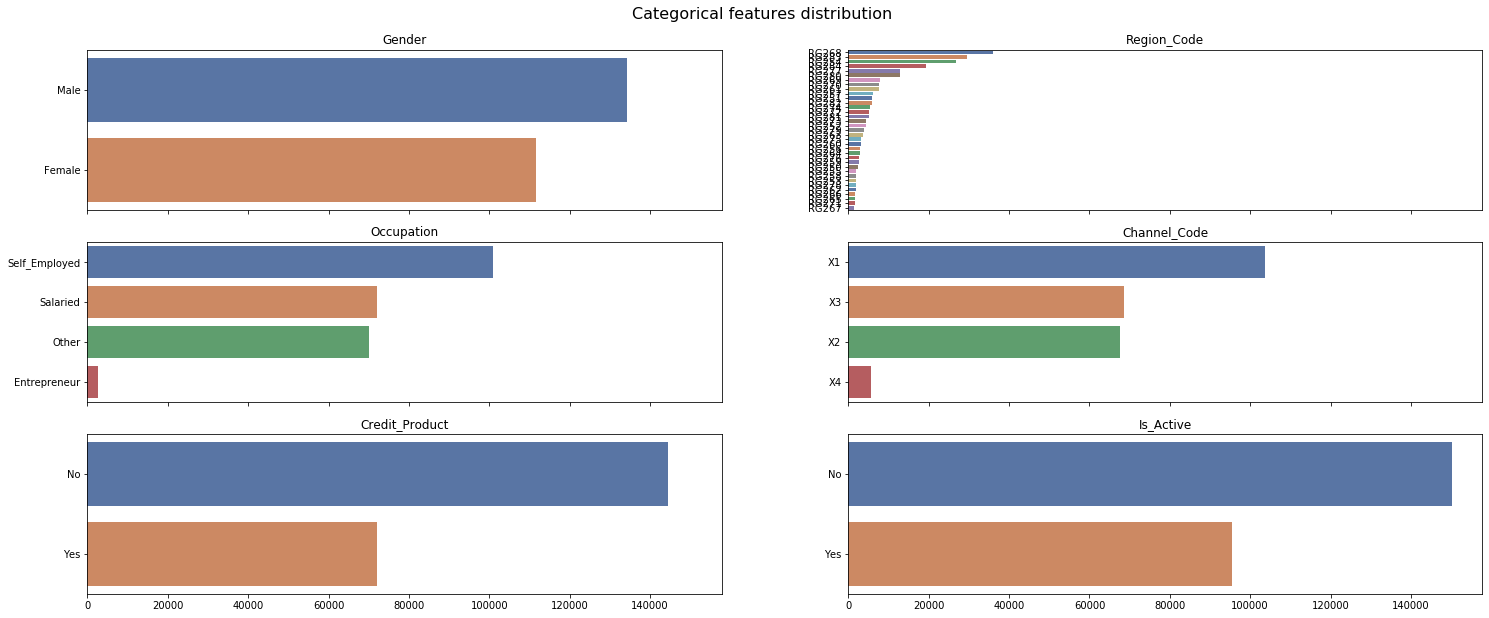

In [7]:
idx = 0
f, axes = plt.subplots(3, 2, sharex=True, figsize=(25,10))
plt.suptitle('Categorical features distribution', size=16, y=(0.94))

for row in range(3):
    for col in range(2):
        data = train_raw[categorical_features[idx]].value_counts()
        sns.barplot(x = data.values, y = data.index, palette='deep', ax=axes[row, col])
        axes[row,col].set_title(categorical_features[idx])
        idx += 1

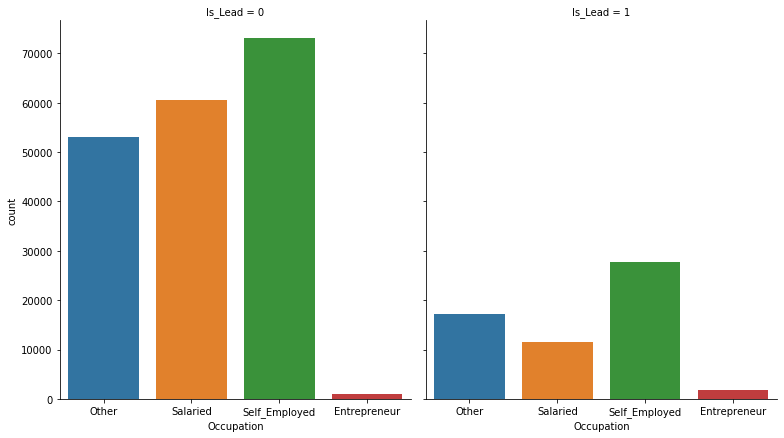

In [8]:
sns.catplot(x="Occupation", col="Is_Lead",
                data=train_raw, kind="count",
                height=6, aspect=.9)

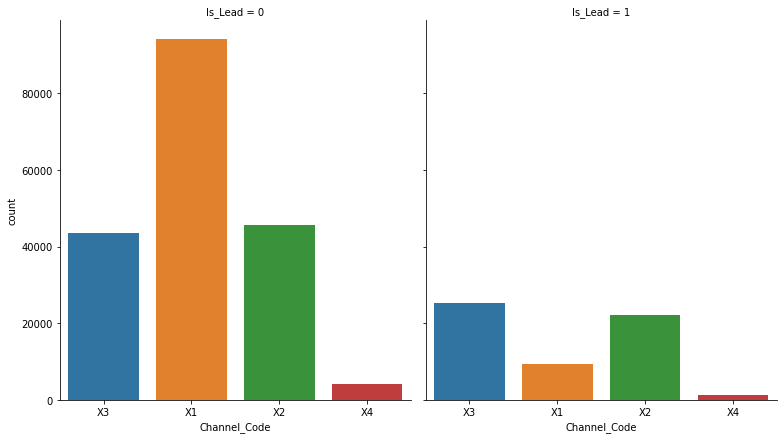

In [9]:
sns.catplot(x="Channel_Code", col="Is_Lead",
                data=train_raw, kind="count",
                height=6, aspect=.9)

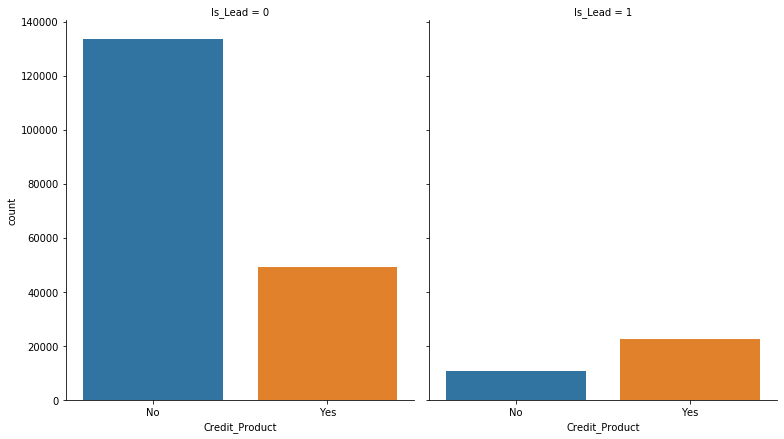

In [10]:
sns.catplot(x="Credit_Product", col="Is_Lead",
                data=train_raw, kind="count",
                height=6, aspect=.9)

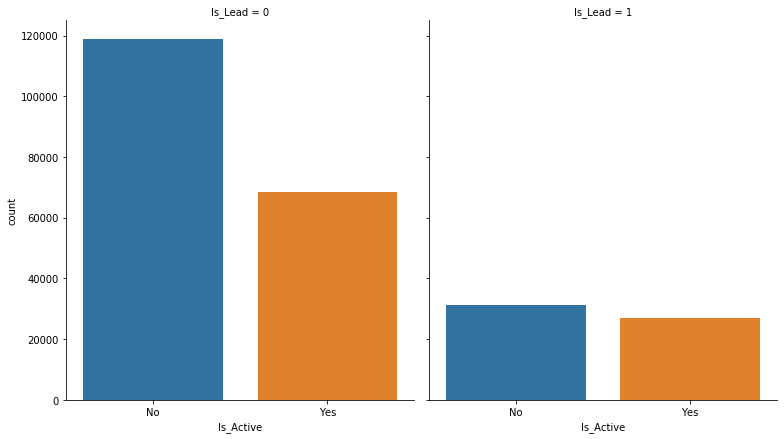

In [11]:
sns.catplot(x="Is_Active", col="Is_Lead",
                data=train_raw, kind="count",
                height=6, aspect=.9)

## Encoding Cat features

In [12]:
#Data encoding
train_raw['Gender']               = train_raw['Gender'].replace({'Female':0,'Male':1})
train_raw["Occupation"]           = train_raw["Occupation"].replace({"Self_Employed":1,"Salaried":2,"Other":3,"Entrepreneur":4})
train_raw["Channel_Code"]         = train_raw["Channel_Code"].replace({'X1':'1','X2':'2','X3':'3','X4':'4'})
train_raw["Credit_Product"]       = train_raw["Credit_Product"].replace({'No':'1','Yes':'2'})
train_raw["Is_Active"]            = train_raw["Is_Active"].replace({'No':'1','Yes':'2'})
train_raw["Region_Code"]          = train_raw["Region_Code"].apply(lambda x:x[2:])

In [13]:
train_raw["Region_Code"]      = pd.to_numeric(train_raw["Region_Code"])
train_raw["Channel_Code"]     = pd.to_numeric(train_raw["Channel_Code"])
train_raw["Credit_Product"]   = pd.to_numeric(train_raw["Credit_Product"])
train_raw["Is_Active"]        = pd.to_numeric(train_raw["Is_Active"])

# EDA (Exproratory Data Analysis)

## Numerical cols Distribution

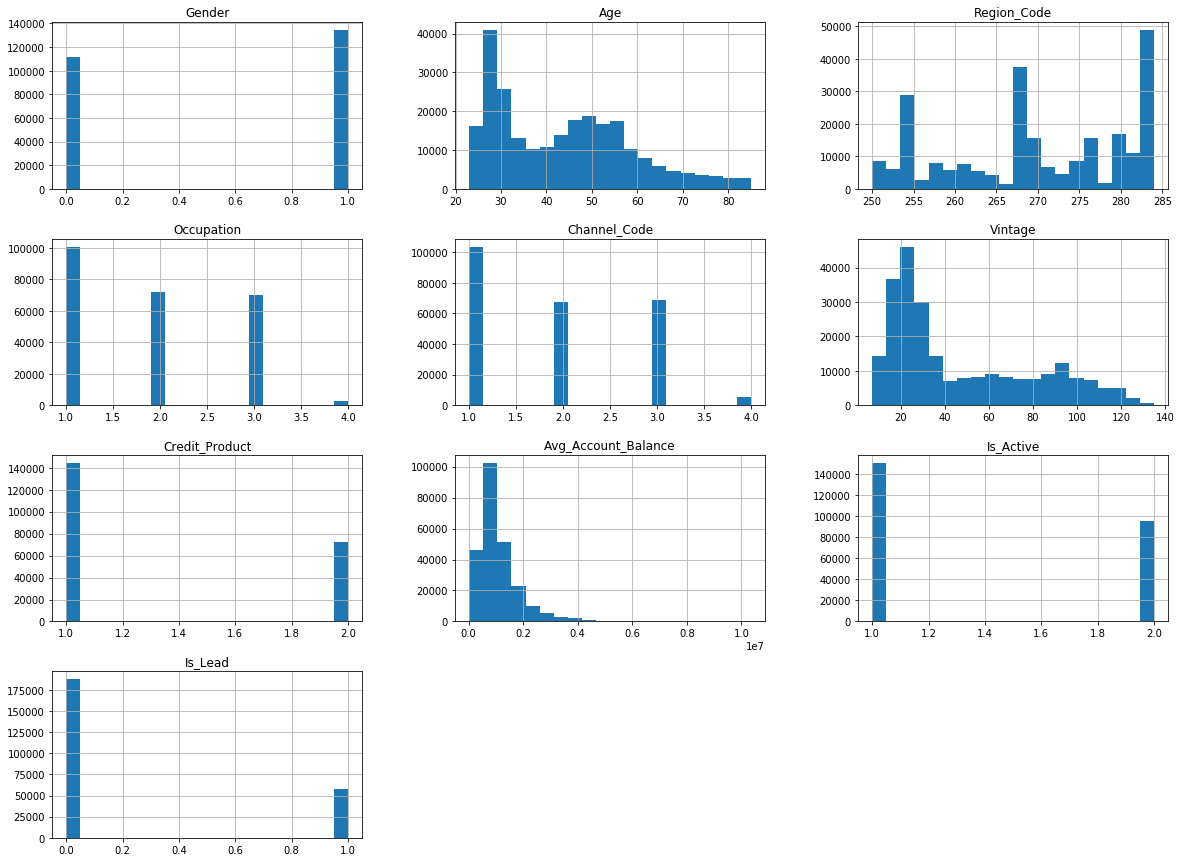

In [14]:
train_raw.hist(bins=20, figsize=(20, 15))
plt.show()

## Scatter plot

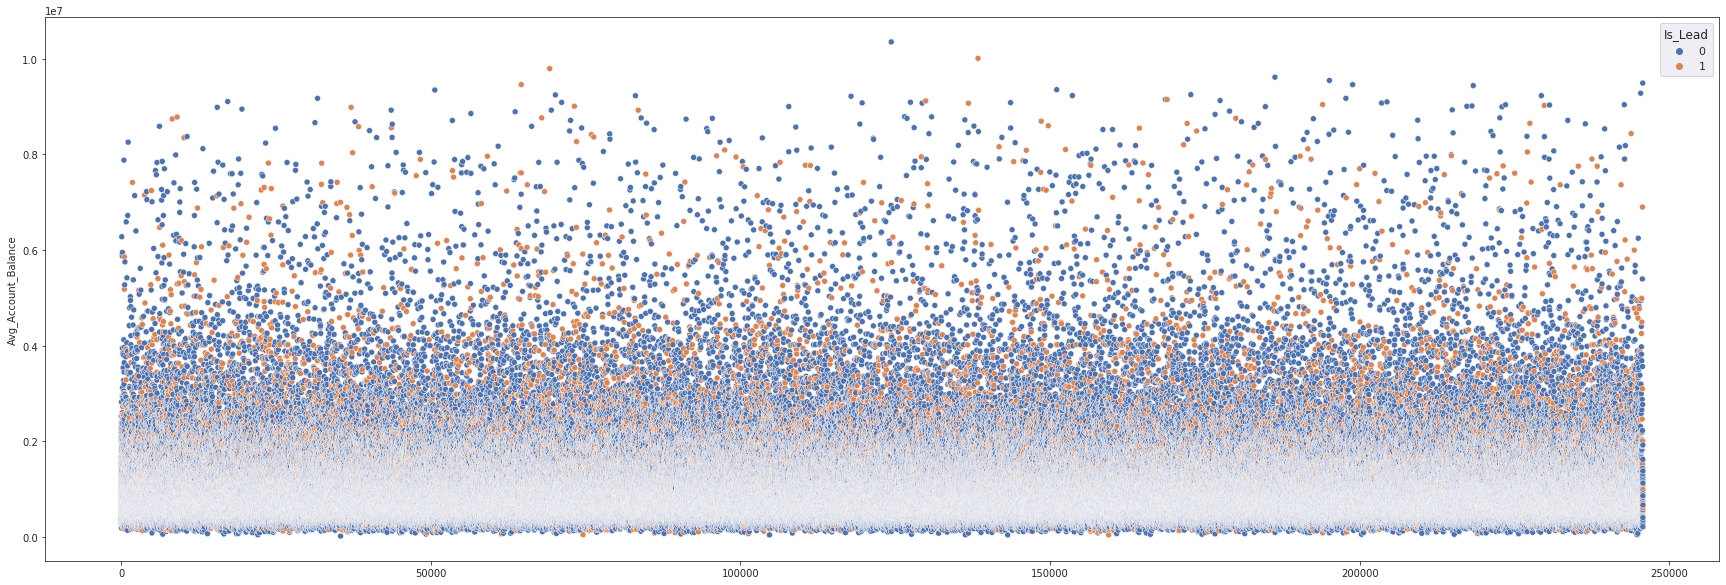

In [15]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=train_raw.index, y=train_raw["Avg_Account_Balance"], hue=train_raw['Is_Lead'])

## Pair Plot

In [16]:
#bivariate analysis by plotting pair plot
#pair-plot
# plt.close()
# sns.set_style("whitegrid")
# sns.pairplot(train_raw, hue="Is_Lead", height=3)
# plt.show()

## Plotting the distributions of all the featuers

<Figure size 432x288 with 0 Axes>

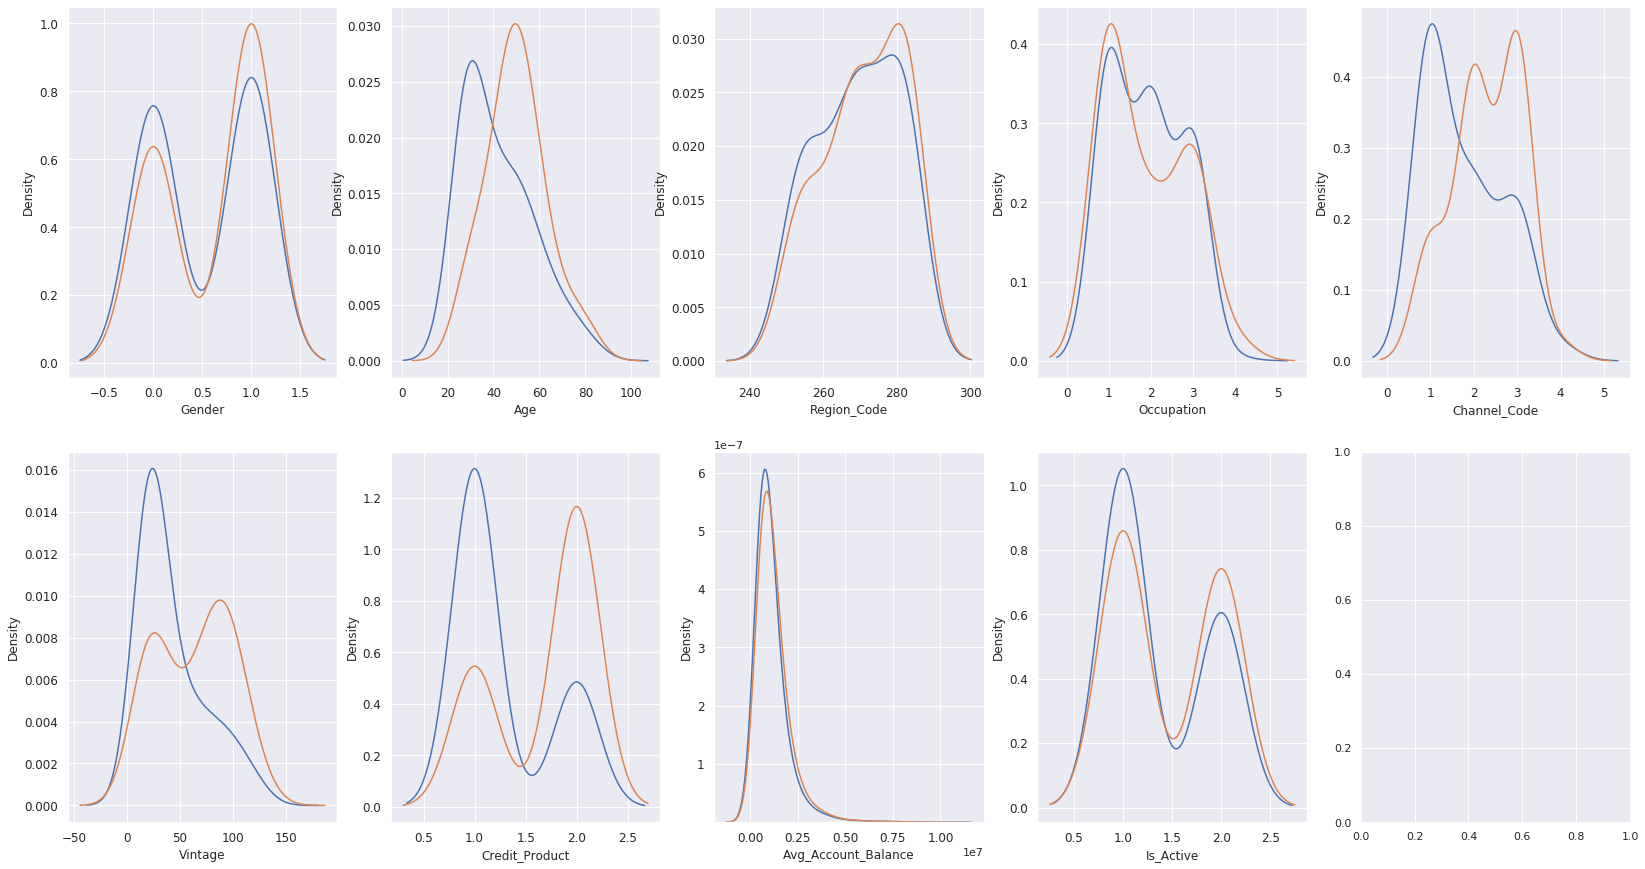

In [17]:
#Plotting the distributions of all the featuers

# Plotting numerical variable in displot to visualise the distribution
train_num = train_raw.select_dtypes(include='number')
var = list(train_num.columns.values)
# dropping Class columns from the list
var.remove("Is_Lead")

i = 0
t0 = train_raw.loc[train_raw['Is_Lead'] == 0]
t1 = train_raw.loc[train_raw['Is_Lead'] == 1]

plt.figure()
fig, ax = plt.subplots(2,5,figsize=(28,15))

for feature in var:
    i += 1
    plt.subplot(2,5,i)
    sns.kdeplot(t0[feature], bw=0.5, label="0")
    sns.kdeplot(t1[feature], bw=0.5, label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [18]:
# train_raw.drop(['Avg_Account_Balance'], axis=1, inplace=True) #dropping Avg_Account_Balance col

Avg_Account_Balance is highly overlapping

# Handling missing Values

In [19]:
train_raw.isnull().sum()/train_raw.isnull().count()*100

Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [20]:
# Checking for the missing value present in each columns
total = train_raw.isnull().sum().sort_values(ascending = False)
percent = (train_raw.isnull().sum()/train_raw.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Credit_Product  Gender  Age  Region_Code  Occupation  Channel_Code  \
Total      29325.000000     0.0  0.0          0.0         0.0           0.0   
Percent       11.934073     0.0  0.0          0.0         0.0           0.0   

         Vintage  Avg_Account_Balance  Is_Active  Is_Lead  
Total        0.0                  0.0        0.0      0.0  
Percent      0.0                  0.0        0.0      0.0

In [21]:
#imputing Credit_Product Nan values with the new value 3
train_raw["Credit_Product"] = train_raw["Credit_Product"].fillna(3)

# again Checking for the missing value present in each columns
total = train_raw.isnull().sum().sort_values(ascending = False)
percent = (train_raw.isnull().sum()/train_raw.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
Total       0.0  0.0          0.0         0.0           0.0      0.0   
Percent     0.0  0.0          0.0         0.0           0.0      0.0   

         Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  
Total               0.0                  0.0        0.0      0.0  
Percent             0.0                  0.0        0.0      0.0

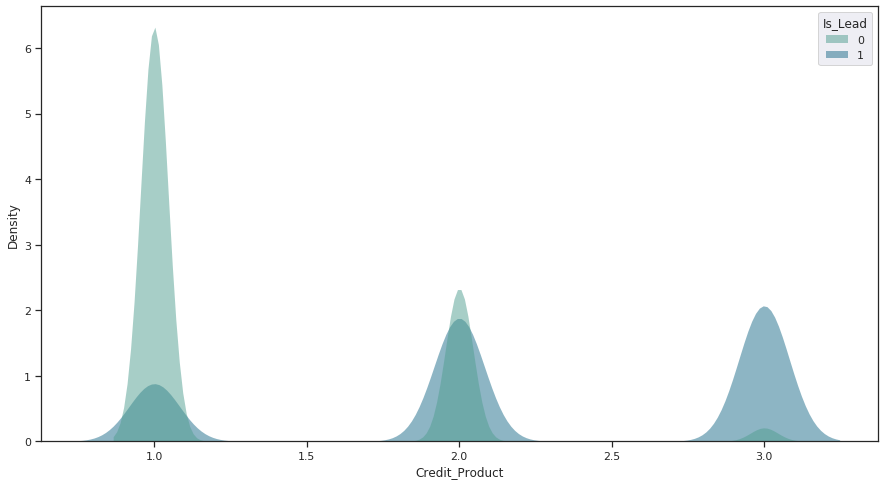

In [22]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_theme(style="darkgrid")
sns.kdeplot(data=train_raw, 
            x="Credit_Product", 
            hue="Is_Lead", 
            fill=True, 
            common_norm=False, 
            palette="crest",
            alpha=.5, 
            linewidth=0)

# Feature Engineering

In [23]:
train = train_raw.copy()
train.head(10)

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   
5       1   56          261           1             1       32   
6       1   62          282           3             3       20   
7       0   48          265           1             3       13   
8       0   40          283           1             2       38   
9       0   55          268           1             2       49   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  
0             1.0              1045696          1        0  
1             1.0               581988          1        0  
2             1.0              1484315          2        0  
3             1.0               470454          1        0  
4             1.0               886787          1        0  
5             1.0               544163          2        0  
6             3.0              1056750          2        1  
7             1.0               444724          2        0  
8             1.0              1274284          1        0  
9             2.0              2014239          1        0

## Binning on age

In [24]:
train.loc[train['Age'].idxmax()]

Gender                      1.0
Age                        85.0
Region_Code               282.0
Occupation                  3.0
Channel_Code                3.0
Vintage                   115.0
Credit_Product              2.0
Avg_Account_Balance    891513.0
Is_Active                   1.0
Is_Lead                     0.0
Name: 411, dtype: float64

Text(0, 0.5, 'Frequency')

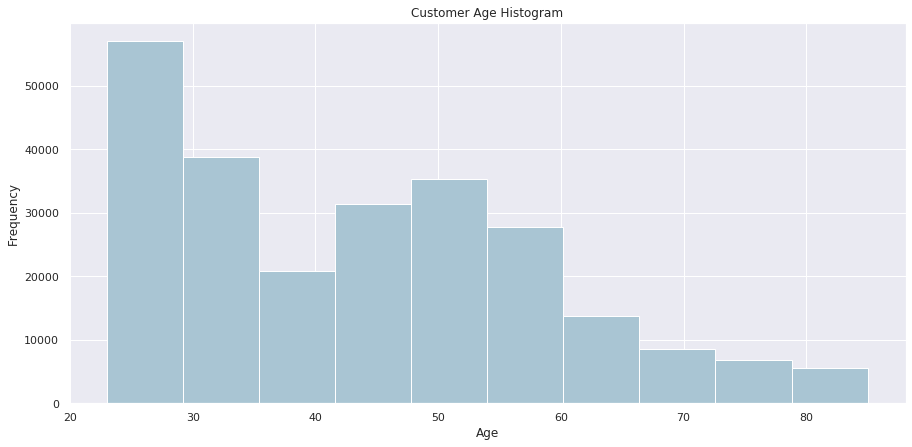

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
train['Age'].hist(color='#A9C5D3')
ax.set_title('Customer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Age bins range

23 -  29  : 0

30 - 39  : 1

40 - 49  : 2

50 - 59  : 3

60 - 69  : 4

70 - 579  : 5

80 - 85  : 6

In [26]:
train['Age_bins'] = np.array(np.floor(np.array(train['Age']) / 10.))
train.iloc[20:25]

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
20       1   44          269           1             2       19   
21       1   27          257           2             1       21   
22       0   32          279           2             1       26   
23       1   50          280           1             3       99   
24       0   31          282           2             1       33   

    Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  
20             2.0              1001650          1        1       4.0  
21             1.0              1239342          1        0       2.0  
22             1.0              1339779          2        0       3.0  
23             1.0               887330          2        0       5.0  
24             1.0               396806          1        0       3.0

## Binarization on Occupation
create a column, if there is a 4 in the occupation it will put 1 corresponds to 4

In [27]:
occupation_binary = np.array(train['Occupation'])
train['occupation_binary'] = train['Occupation'].map(lambda x: 1 if x == 4 else 0)
train.head(10)

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   
5       1   56          261           1             1       32   
6       1   62          282           3             3       20   
7       0   48          265           1             3       13   
8       0   40          283           1             2       38   
9       0   55          268           1             2       49   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
0             1.0              1045696          1        0       7.0   
1             1.0               581988          1        0       3.0   
2             1.0              1484315          2        0       5.0   
3             1.0               470454          1        0       3.0   
4             1.0               886787          1        0       3.0   
5             1.0               544163          2        0       5.0   
6             3.0              1056750          2        1       6.0   
7             1.0               444724          2        0       4.0   
8             1.0              1274284          1        0       4.0   
9             2.0              2014239          1        0       5.0   

   occupation_binary  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  
6                  0  
7                  0  
8                  0  
9                  0

## Modifying vintage month to year

In [28]:
train['vintage_yr'] = np.array(np.floor(np.array(train['Vintage']) / 12.))
train.head(8)

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   
5       1   56          261           1             1       32   
6       1   62          282           3             3       20   
7       0   48          265           1             3       13   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
0             1.0              1045696          1        0       7.0   
1             1.0               581988          1        0       3.0   
2             1.0              1484315          2        0       5.0   
3             1.0               470454          1        0       3.0   
4             1.0               886787          1        0       3.0   
5             1.0               544163          2        0       5.0   
6             3.0              1056750          2        1       6.0   
7             1.0               444724          2        0       4.0   

   occupation_binary  vintage_yr  
0                  0         3.0  
1                  0         2.0  
2                  0         2.0  
3                  0         1.0  
4                  0         2.0  
5                  0         2.0  
6                  0         1.0  
7                  0         1.0

## Binarization on Credit product
create a column, if there is a 3 in the Credit product it will put 1 corresponds to 3

In [29]:
Credit_Product_binary = np.array(train['Credit_Product'])
train['Credit_Product_binary'] = train['Credit_Product'].map(lambda x: 1 if x == 3 else 0)
train.head()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       0   73          268           3             3       43   
1       0   30          277           2             1       32   
2       0   56          268           1             3       26   
3       1   34          270           2             1       19   
4       0   30          282           2             1       33   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
0             1.0              1045696          1        0       7.0   
1             1.0               581988          1        0       3.0   
2             1.0              1484315          2        0       5.0   
3             1.0               470454          1        0       3.0   
4             1.0               886787          1        0       3.0   

   occupation_binary  vintage_yr  Credit_Product_binary  
0                  0         3.0                      0  
1                  0         2.0                      0  
2                  0         2.0                      0  
3                  0         1.0                      0  
4                  0         2.0                      0

## Binning Avg_Account_Balance with inter quartile range

Text(0, 0.5, 'Frequency')

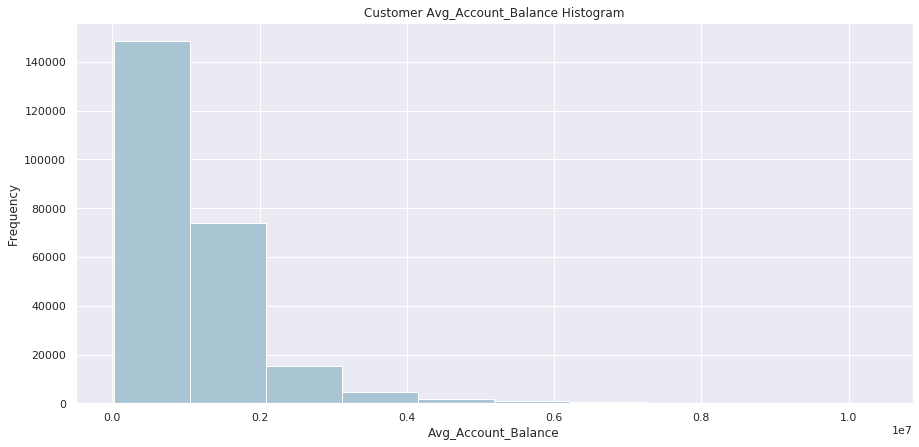

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
train['Avg_Account_Balance'].hist(color='#A9C5D3')
ax.set_title('Customer Avg_Account_Balance Histogram', fontsize=12)
ax.set_xlabel('Avg_Account_Balance', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [31]:
quantiles_range = [0, .25, .5, .75, 1.]
quantiles = train['Avg_Account_Balance'].quantile(quantiles_range)
quantiles

0.00       20790.0
0.25      604310.0
0.50      894601.0
0.75     1366666.0
1.00    10352009.0
Name: Avg_Account_Balance, dtype: float64

Text(0, 0.5, 'Frequency')

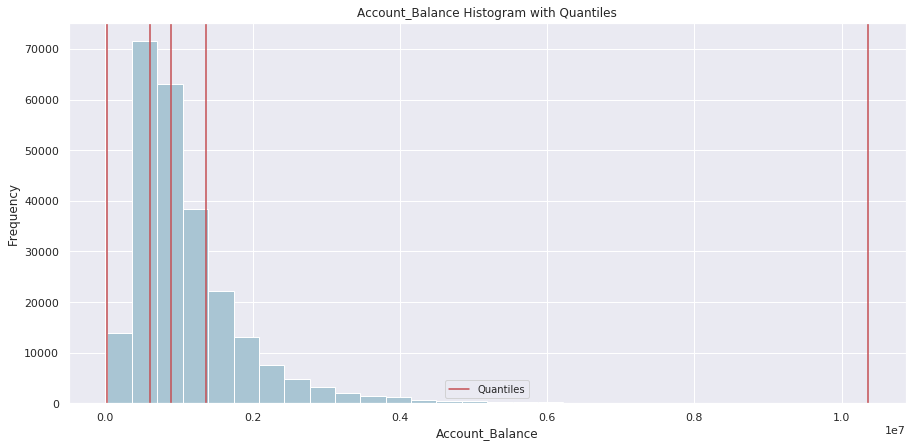

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
train['Avg_Account_Balance'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Account_Balance Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Account_Balance', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [33]:
quantile_labels = ['25', '50', '75', '100']
train['Avg_Account_Balance_quantile'] = pd.qcut(train['Avg_Account_Balance'], q=quantiles_range, labels=quantile_labels)
train.iloc[4:9]

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
4       0   30          282           2             1       33   
5       1   56          261           1             1       32   
6       1   62          282           3             3       20   
7       0   48          265           1             3       13   
8       0   40          283           1             2       38   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
4             1.0               886787          1        0       3.0   
5             1.0               544163          2        0       5.0   
6             3.0              1056750          2        1       6.0   
7             1.0               444724          2        0       4.0   
8             1.0              1274284          1        0       4.0   

   occupation_binary  vintage_yr  Credit_Product_binary  \
4                  0         2.0                      0   
5                  0         2.0                      0   
6                  0         1.0                      1   
7                  0         1.0                      0   
8                  0         3.0                      0   

  Avg_Account_Balance_quantile  
4                           50  
5                           25  
6                           75  
7                           25  
8                           75

## log transformation on Avg_Account_Balance with inter quartile range

In [34]:
train['Avg_Account_Balance_log'] = np.log((1 + train['Avg_Account_Balance']))
train.iloc[4:9]

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
4       0   30          282           2             1       33   
5       1   56          261           1             1       32   
6       1   62          282           3             3       20   
7       0   48          265           1             3       13   
8       0   40          283           1             2       38   

   Credit_Product  Avg_Account_Balance  Is_Active  Is_Lead  Age_bins  \
4             1.0               886787          1        0       3.0   
5             1.0               544163          2        0       5.0   
6             3.0              1056750          2        1       6.0   
7             1.0               444724          2        0       4.0   
8             1.0              1274284          1        0       4.0   

   occupation_binary  vintage_yr  Credit_Product_binary  \
4                  0         2.0                      0   
5                  0         2.0                      0   
6                  0         1.0                      1   
7                  0         1.0                      0   
8                  0         3.0                      0   

  Avg_Account_Balance_quantile  Avg_Account_Balance_log  
4                           50                13.695361  
5                           25                13.207006  
6                           75                13.870710  
7                           25                13.005211  
8                           75                14.057896

In [35]:
train['Avg_Account_Balance_quantile'] = pd.to_numeric(train["Avg_Account_Balance_quantile"])

## Create another column where convert the balance of last 12 months(1yr) balance into 1 month

In [36]:
train['Avg_Account_Balance_monthly'] = np.array(np.floor(np.array(train['Avg_Account_Balance']) / 12.))
train

Gender  Age  ...  Avg_Account_Balance_log  Avg_Account_Balance_monthly
0            0   73  ...                13.860194                      87141.0
1            0   30  ...                13.274207                      48499.0
2            0   56  ...                14.210465                     123692.0
3            1   34  ...                13.061456                      39204.0
4            0   30  ...                13.695361                      73898.0
...        ...  ...  ...                      ...                          ...
245720       1   51  ...                14.470741                     160465.0
245721       1   27  ...                13.668116                      71912.0
245722       0   26  ...                13.416018                      55888.0
245723       0   28  ...                12.917808                      33958.0
245724       1   29  ...                13.937088                      94106.0

[245725 rows x 17 columns]

## if Is_Active = 2(yes) which means customer is active in last three months. I'll put 3 corresponds to 2(yes) 

In [37]:
is_Active = np.array(train['Is_Active'])
train['is_Active_3(yes)'] = train['Is_Active'].map(lambda x: 1 if x == 2 else 0)
train.head(10)

Gender  Age  ...  Avg_Account_Balance_monthly  is_Active_3(yes)
0       0   73  ...                      87141.0                 0
1       0   30  ...                      48499.0                 0
2       0   56  ...                     123692.0                 1
3       1   34  ...                      39204.0                 0
4       0   30  ...                      73898.0                 0
5       1   56  ...                      45346.0                 1
6       1   62  ...                      88062.0                 1
7       0   48  ...                      37060.0                 1
8       0   40  ...                     106190.0                 0
9       0   55  ...                     167853.0                 0

[10 rows x 18 columns]

## Create columns that has product of weak features
5 weak features


1.   Age
2.   Vintage
3.   region code
4.   Avg_Account_Balance_quantile
5.   Avg_Account_Balance_log



It will create three more feature





In [38]:
train['combination1']   = train['Age']  * train['Vintage']
train['combination2']   = train['Vintage']  * train['Region_Code'] 
train['combination3']   = train['Region_Code'] * train['Age']
train['combination4']   = train['Age']  * train['Vintage'] * train['Region_Code']
train['combination5']   = train['Vintage']  * train['Region_Code'] * train['Avg_Account_Balance_quantile'] 
train['combination6']   = train['Avg_Account_Balance_quantile'] * train['Age']  * train['Avg_Account_Balance_log']
train

Gender  Age  Region_Code  ...  combination4  combination5  combination6
0            0   73          268  ...        841252        864300  75884.563282
1            0   30          277  ...        265920        221600   9955.655120
2            0   56          268  ...        390208        696800  79578.601861
3            1   34          270  ...        174420        128250  11102.237252
4            0   30          282  ...        279180        465300  20543.041837
...        ...  ...          ...  ...           ...           ...           ...
245720       1   51          284  ...       1578756       3095600  73800.781213
245721       1   27          268  ...        108540        201000  18451.955935
245722       0   26          281  ...         94978        182650  17440.822855
245723       0   28          273  ...        236964        211575   9042.465937
245724       1   29          269  ...        163821        423675  30313.166754

[245725 rows x 24 columns]

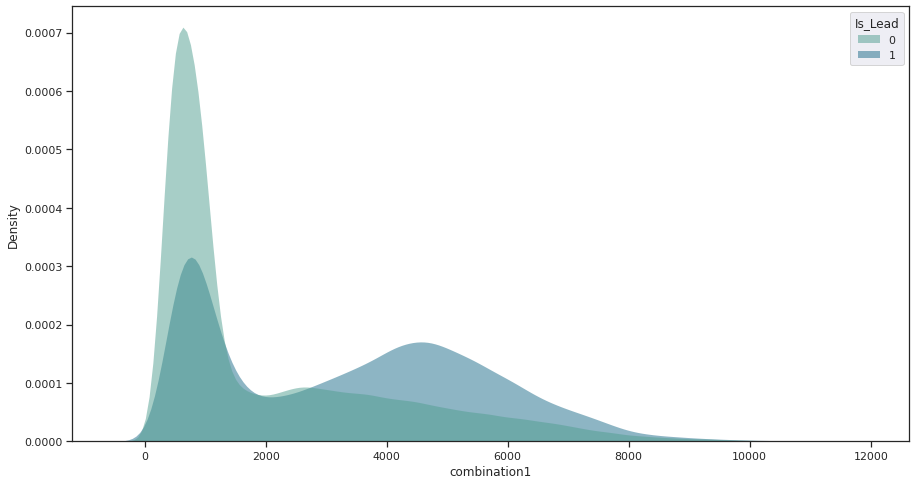

In [39]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_theme(style="darkgrid")
sns.kdeplot(data=train, 
            x="combination1", 
            hue="Is_Lead", 
            fill=True, 
            common_norm=False, 
            palette="crest",
            alpha=.5, 
            linewidth=0)

# Analysis on new Modified data

<Figure size 432x288 with 0 Axes>

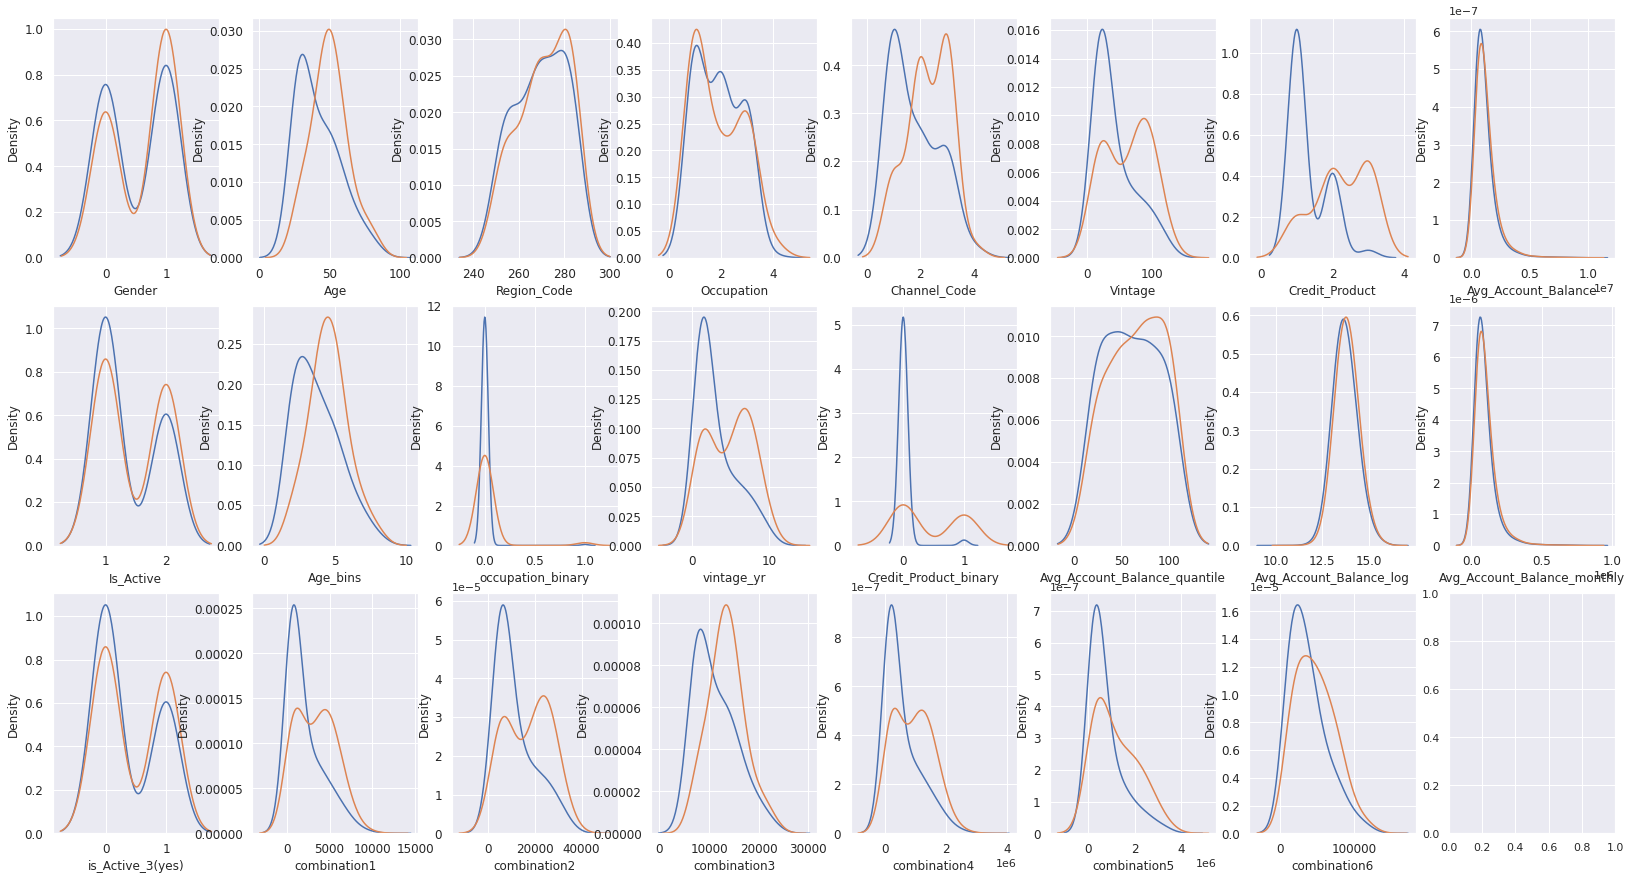

In [40]:
#Plotting the distributions of all the featuers

# Plotting numerical variable in displot to visualise the distribution
train_num = train.select_dtypes(include='number')
var = list(train_num.columns.values)
# dropping Class columns from the list
var.remove("Is_Lead")

i = 0
t0 = train.loc[train['Is_Lead'] == 0]
t1 = train.loc[train['Is_Lead'] == 1]

plt.figure()
fig, ax = plt.subplots(3,8,figsize=(28,15))

for feature in var:
    i += 1
    plt.subplot(3,8,i)
    sns.kdeplot(t0[feature], bw=0.5, label="0")
    sns.kdeplot(t1[feature], bw=0.5, label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [41]:
train.drop(['Avg_Account_Balance'], axis=1, inplace=True)
train.drop(['Avg_Account_Balance_log'], axis=1, inplace=True)
train.drop(['Avg_Account_Balance_monthly'], axis=1, inplace=True)

## Transformation

In [42]:
train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Is_Active', 'Is_Lead', 'Age_bins',
       'occupation_binary', 'vintage_yr', 'Credit_Product_binary',
       'Avg_Account_Balance_quantile', 'is_Active_3(yes)', 'combination1',
       'combination2', 'combination3', 'combination4', 'combination5',
       'combination6'],
      dtype='object')

In [43]:
std_scl = preprocessing.StandardScaler() #instance of preprocessing

cols = ['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Is_Active', 'Age_bins',
       'occupation_binary', 'vintage_yr', 'Credit_Product_binary',
       'Avg_Account_Balance_quantile', 'is_Active_3(yes)', 'combination1',
       'combination2', 'combination3', 'combination4', 'combination5',
       'combination6']
train_scl = pd.DataFrame(std_scl.fit_transform(train[cols]), columns = cols)
train_scl['Is_Lead'] = train['Is_Lead']
train_scl['Is_Lead'].value_counts()
train_scl

Gender       Age  Region_Code  ...  combination5  combination6  Is_Lead
0      -1.096931  1.965365    -0.172389  ...      0.024771      1.428893        0
1      -1.096931 -0.934429     0.655830  ...     -0.793932     -1.155689        0
2      -1.096931  0.818935    -0.172389  ...     -0.188598      1.573709        0
3       0.911634 -0.664680     0.011660  ...     -0.912845     -1.110740        0
4      -1.096931 -0.934429     1.115951  ...     -0.483494     -0.740637        0
...          ...       ...          ...  ...           ...           ...      ...
245720  0.911634  0.481750     1.300000  ...      2.867112      1.347203        0
245721  0.911634 -1.136740    -0.172389  ...     -0.820173     -0.822613        0
245722 -1.096931 -1.204177     1.023927  ...     -0.843548     -0.862252        0
245723 -1.096931 -1.069303     0.287733  ...     -0.806702     -1.191489        0
245724  0.911634 -1.001866    -0.080365  ...     -0.536518     -0.357623        0

[245725 rows x 21 columns]

## check Skewness

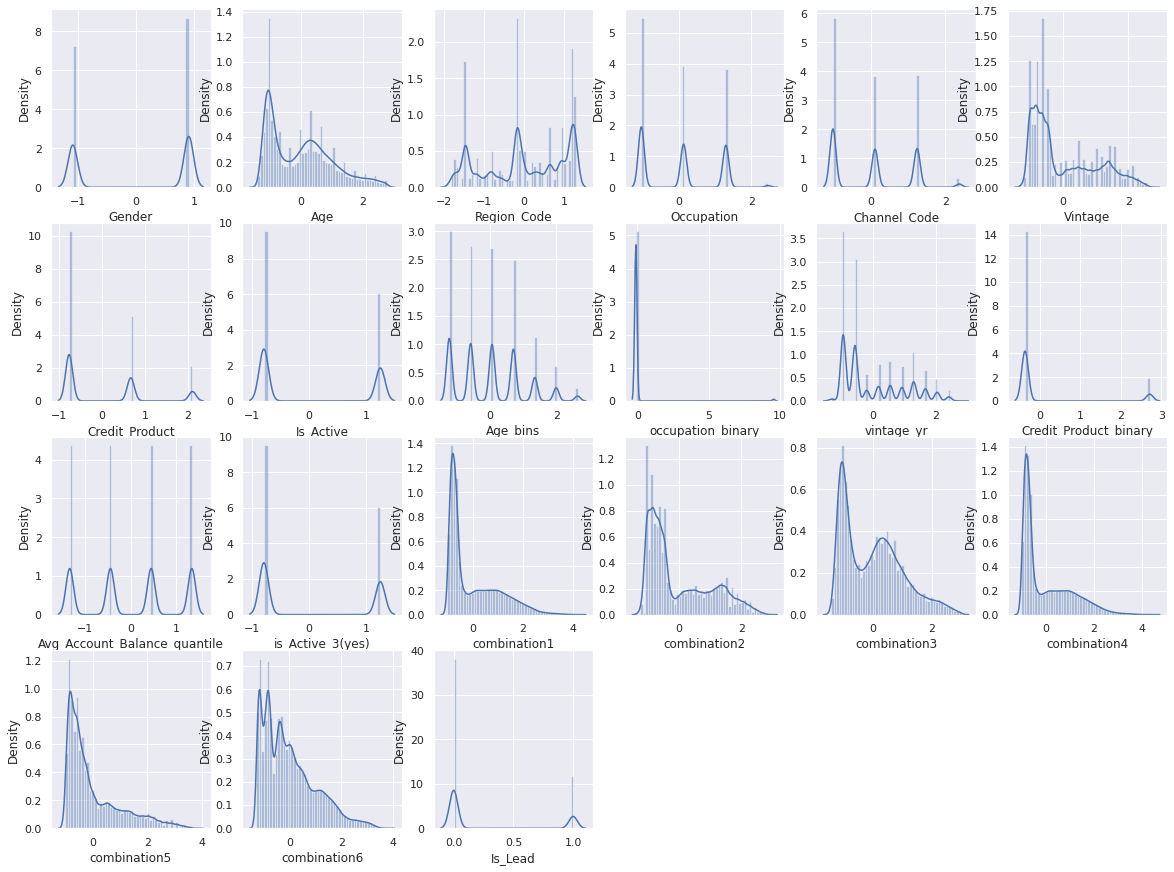

In [44]:
# plot the histogram of a variable from the dataset to see the skewness
var = train_scl.columns

plt.figure(figsize=(20,19))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(train_scl[col])

plt.show()

In [45]:
# Lets check the skewness of the features
var = train_scl.columns
skew_list = []
for i in var:
    skew_list.append(train_scl[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features    Gender       Age  Region_Code  ...  combination5  combination6   Is_Lead
Skewness -0.185298  0.618992     -0.26556  ...      1.346272      0.905815  1.235596

[1 rows x 21 columns]

In [46]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['occupation_binary', 'Credit_Product_binary', 'combination1',
       'combination4', 'combination5', 'Is_Lead'],
      dtype='object', name='Features')


In [47]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)
# Fitting the power transformer in train data
train_scl['occupation_binary'] = pt.fit_transform(train_scl[['occupation_binary']])
train_scl['occupation_binary'] = pt.transform(train_scl[['occupation_binary']])

train_scl['Credit_Product_binary'] = pt.fit_transform(train_scl[['Credit_Product_binary']])
train_scl['Credit_Product_binary'] = pt.transform(train_scl[['Credit_Product_binary']])

train_scl['combination1'] = pt.fit_transform(train_scl[['combination1']])
train_scl['combination1'] = pt.transform(train_scl[['combination1']])

train_scl['combination4'] = pt.fit_transform(train_scl[['combination4']])
train_scl['combination4'] = pt.transform(train_scl[['combination4']])

train_scl['combination5'] = pt.fit_transform(train_scl[['combination5']])
train_scl['combination5'] = pt.transform(train_scl[['combination5']])

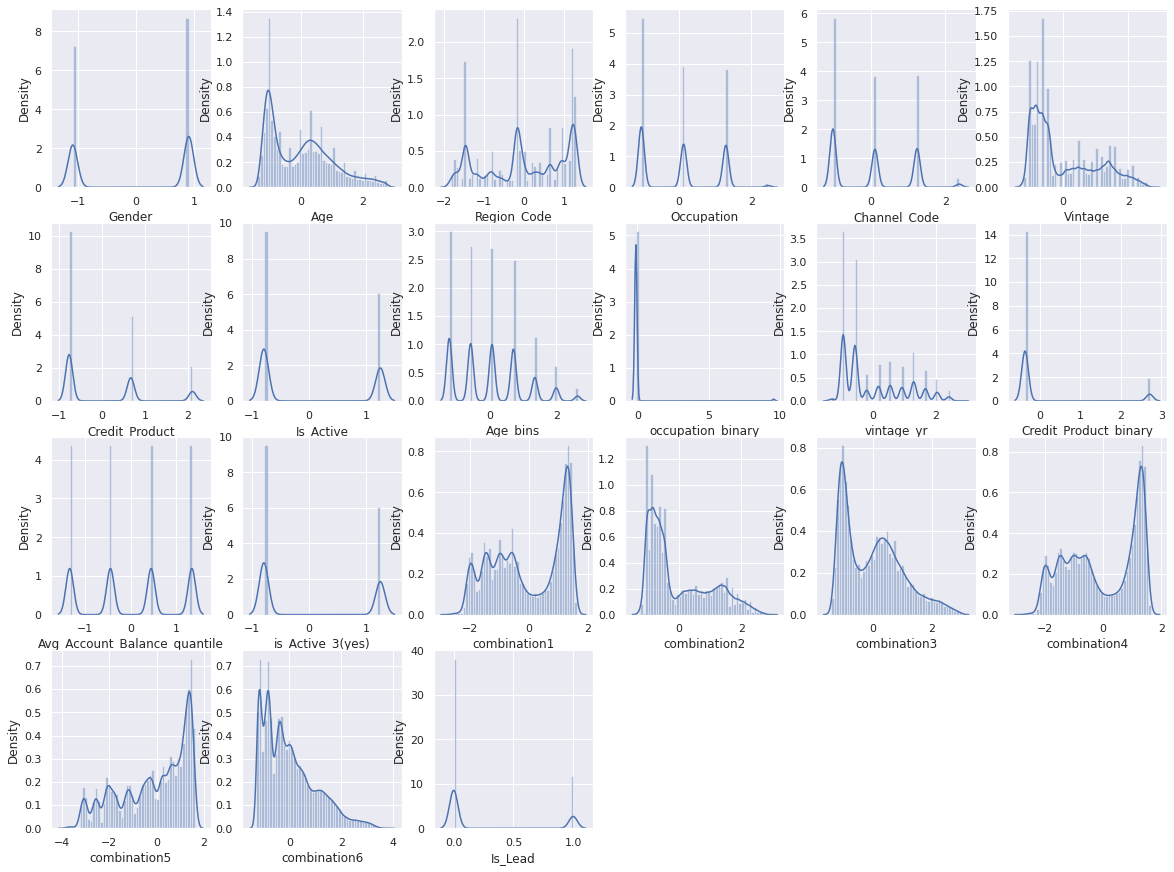

In [48]:
# plot the histogram of a variable from the dataset to see the skewness
var = train_scl.columns

plt.figure(figsize=(20,19))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(train_scl[col])

plt.show()

## Class analysis

In [49]:
classes = train_scl['Is_Lead'].value_counts()
islead_0 = round(classes[0]/train_scl['Is_Lead'].count()*100,2)
islead_1 = round(classes[1]/train_scl['Is_Lead'].count()*100, 2)
islead_0, islead_1

(76.28, 23.72)

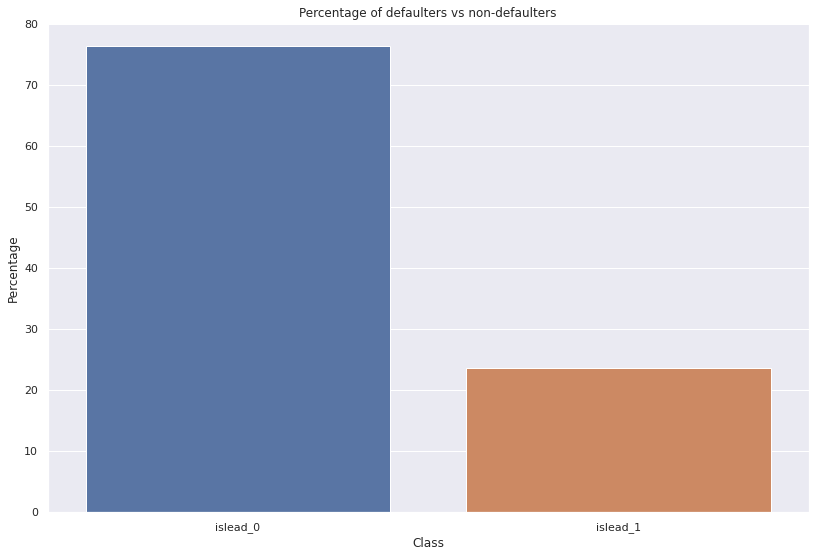

In [50]:
# Create a bar plot for the number and percentage of islead_0 vs islead_1
plt.figure(figsize=(30,9))

plt.subplot(1,2,2)
islead_percentage = {'Class':['islead_0', 'islead_1'], 'Percentage':[islead_0, islead_1]} 
df_islead_percentage = pd.DataFrame(islead_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_islead_percentage)
plt.title('Percentage of defaulters vs non-defaulters')

plt.show()

#Test data

In [51]:
test_raw     = pd.read_csv('/content/drive/MyDrive/AV jobathon may/test_mSzZ8RL.csv')
#Data encoding
test_raw['Gender']               = test_raw['Gender'].replace({'Female':0,'Male':1})
test_raw["Occupation"]           = test_raw["Occupation"].replace({"Self_Employed":1,"Salaried":2,"Other":3,"Entrepreneur":4})
test_raw["Channel_Code"]         = test_raw["Channel_Code"].replace({'X1':'1','X2':'2','X3':'3','X4':'4'})
test_raw["Credit_Product"]       = test_raw["Credit_Product"].replace({'No':'1','Yes':'2'})
test_raw["Is_Active"]            = test_raw["Is_Active"].replace({'No':'1','Yes':'2'})
test_raw["Region_Code"]          = test_raw["Region_Code"].apply(lambda x:x[2:])

test_raw["Credit_Product"] = test_raw["Credit_Product"].fillna(3)

test_raw["Region_Code"]      = pd.to_numeric(test_raw["Region_Code"])
test_raw["Channel_Code"]     = pd.to_numeric(test_raw["Channel_Code"])
test_raw["Credit_Product"]   = pd.to_numeric(test_raw["Credit_Product"])
test_raw["Is_Active"]        = pd.to_numeric(test_raw["Is_Active"])


test_raw['Age_bins'] = np.array(np.floor(np.array(test_raw['Age']) / 10.))

occupation_binary = np.array(test_raw['Occupation'])
test_raw['occupation_binary'] = test_raw['Occupation'].map(lambda x: 1 if x == 4 else 0)

test_raw['vintage_yr'] = np.array(np.floor(np.array(test_raw['Vintage']) / 12.))

Credit_Product_binary = np.array(test_raw['Credit_Product'])
test_raw['Credit_Product_binary'] = test_raw['Credit_Product'].map(lambda x: 1 if x == 3 else 0)

quantiles_range = [0, .25, .5, .75, 1.]
quantiles = test_raw['Avg_Account_Balance'].quantile(quantiles_range)
quantile_labels = ['25', '50', '75', '100']
test_raw['Avg_Account_Balance_quantile'] = pd.qcut(test_raw['Avg_Account_Balance'], q=quantiles_range, labels=quantile_labels)
test_raw['Avg_Account_Balance_quantile'] = pd.to_numeric(test_raw["Avg_Account_Balance_quantile"])

test_raw['Avg_Account_Balance_log'] = np.log((1 + test_raw['Avg_Account_Balance']))

test_raw['Avg_Account_Balance_monthly'] = np.array(np.floor(np.array(test_raw['Avg_Account_Balance']) / 12.))

is_Active = np.array(test_raw['Is_Active'])
test_raw['is_Active_3(yes)'] = test_raw['Is_Active'].map(lambda x: 3 if x == 2 else 0)

test_raw['combination1']   = test_raw['Age']  * test_raw['Vintage']
test_raw['combination2']   = test_raw['Vintage']  * test_raw['Region_Code'] 
test_raw['combination3']   = test_raw['Region_Code'] * test_raw['Age']
test_raw['combination4']   = test_raw['Age']  * test_raw['Vintage'] * test_raw['Region_Code']
test_raw['combination5']   = test_raw['Vintage']  * test_raw['Region_Code'] * test_raw['Avg_Account_Balance_quantile'] 
test_raw['combination6']   = test_raw['Avg_Account_Balance_quantile'] * test_raw['Age']  * test_raw['Avg_Account_Balance_log']

test_raw.drop(['ID'], axis = 1, inplace=True)
test_raw.drop(['Avg_Account_Balance'], axis = 1, inplace=True)
test_raw.drop(['Avg_Account_Balance_log'], axis=1, inplace=True)
test_raw.drop(['Avg_Account_Balance_monthly'], axis=1, inplace=True)

std_scl = preprocessing.StandardScaler() #instance of preprocessing
cols = test_raw.columns.values
test_scl = pd.DataFrame(std_scl.fit_transform(test_raw[cols]), columns = cols)

# Lets check the skewness of the features
var = test_scl.columns
skew_list = []
for i in var:
    skew_list.append(test_scl[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)

# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
for i in skewed:
  # preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
  pt = PowerTransformer(copy=False)
  # Fitting the power transformer in train data
  test_scl[i] = pt.fit_transform(test_scl[[i]])
test_scl

Gender       Age  ...  combination5  combination6
0       0.908299 -0.999878  ...     -0.718565     -0.778098
1       0.908299 -0.058563  ...      0.651221      0.191249
2       0.908299 -0.865404  ...     -1.447281     -1.173659
3       0.908299 -0.999878  ...     -0.355746     -0.769198
4      -1.100959 -0.999878  ...     -0.903657     -0.785041
...          ...       ...  ...           ...           ...
105307  0.908299  0.546567  ...      1.570821      1.566507
105308  0.908299  0.748278  ...      1.320043      0.712816
105309  0.908299 -0.596457  ...     -0.537080      0.423284
105310  0.908299  0.613804  ...      0.868849     -0.142360
105311  0.908299 -1.134351  ...     -1.306289     -1.195164

[105312 rows x 20 columns]

# Model Building

In [52]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [53]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(12, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [54]:
cols

array(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Is_Active', 'Age_bins',
       'occupation_binary', 'vintage_yr', 'Credit_Product_binary',
       'Avg_Account_Balance_quantile', 'is_Active_3(yes)', 'combination1',
       'combination2', 'combination3', 'combination4', 'combination5',
       'combination6'], dtype=object)

In [55]:
X = train_scl[cols]
y = train_scl['Is_Lead']

In [56]:
# Spltting the into 80:20 train test size
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(196580, 20)
(49145, 20)
(196580,)
(49145,)


## XGboost

In [72]:
# specify model
params = {'learning_rate': 0.003,
          'max_depth': 100, 
          'n_estimators':200,
          'subsample':0.3,
          'eval_metric' : 'auc',
         'objective':'binary:logistic'}
xgb_model = XGBClassifier(params = params)
# fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'eval_metric': 'auc', 'learning_rate': 0.6,
                      'max_depth': 100, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [83]:
xgb_model.score(X_train, y_train)

0.8600925831722454

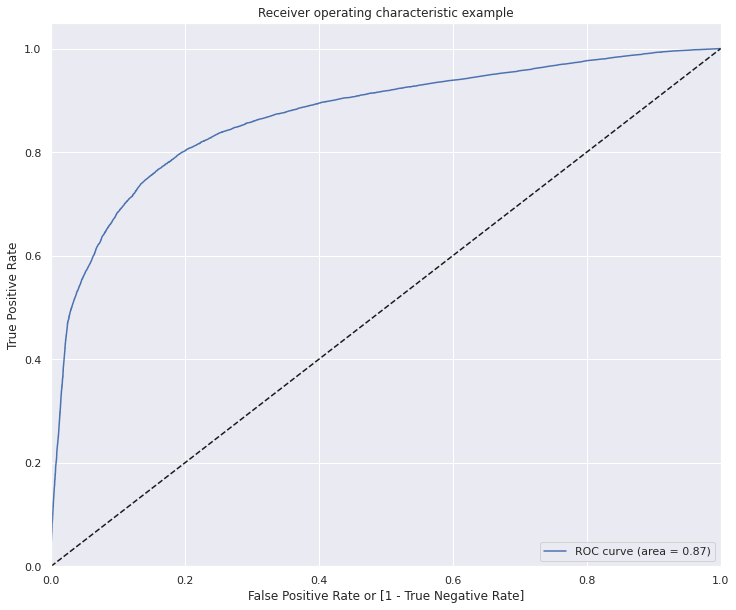

In [84]:
# Predicted probability
y_pred = xgb_model.predict_proba(X_val)[:,1]

# Plot the ROC curve
draw_roc(y_val, y_pred)

In [85]:
xgb_test_preds = xgb_model.predict_proba(test_scl)[:,1]
sub['Is_Lead'] = pd.Series(xgb_test_preds)
sub.to_csv('s_xb6.csv', index=False)
sub

ID   Is_Lead
0       VBENBARO  0.063826
1       CCMEWNKY  0.853099
2       VK3KGA9M  0.053940
3       TT8RPZVC  0.025816
4       SHQZEYTZ  0.025816
...          ...       ...
105307  DBENJOYI  0.924546
105308  CWQ72DWS  0.541402
105309  HDESC8GU  0.092822
105310  2PW4SFCA  0.260305
105311  F2NOYPPZ  0.050371

[105312 rows x 2 columns]

## other models

In [57]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [58]:
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### LGM classifier

In [92]:
lgm = LGBMClassifier(n_estimators=5000,
                   random_state=1994,
                   learning_rate=0.01,
                   colsample_bytree=0.5,
                   reg_alpha=4,
                   min_split_gain=0.2,
                   min_child_samples=2,
                   bagging_fraction=0.9,
                   max_depth=100)

lgm.fit(X_train,y_train, eval_set=[(X_val, y_val)], eval_metric='AUC', early_stopping_rounds=200, verbose=200)
p = lgm.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val, p))

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.363365	valid_0's auc: 0.869432
[400]	valid_0's binary_logloss: 0.348312	valid_0's auc: 0.871683
[600]	valid_0's binary_logloss: 0.346219	valid_0's auc: 0.872143
[800]	valid_0's binary_logloss: 0.345817	valid_0's auc: 0.872176
[1000]	valid_0's binary_logloss: 0.345736	valid_0's auc: 0.872164
Early stopping, best iteration is:
[826]	valid_0's binary_logloss: 0.345787	valid_0's auc: 0.872197
0.8721973427791916


In [93]:
lgm_test_preds = lgm.predict_proba(test_scl)[:,1]
sub['Is_Lead'] = pd.Series(lgm_test_preds)
sub.to_csv('s_lgm1.csv', index=False)

### Catboost

In [94]:
cb = CatBoostClassifier(n_estimators=3000, 
                        random_state=1994,
                        eval_metric='AUC',
                        learning_rate=0.01,
                        random_strength=200,
                        bagging_temperature=0.6,
                        l2_leaf_reg=4,
                        one_hot_max_size=10)

cb.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100, verbose=200)
p = cb.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))

0:	test: 0.7838189	test1: 0.7819621	best: 0.7819621 (0)	total: 148ms	remaining: 7m 22s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8558852867
bestIteration = 4

Shrink model to first 5 iterations.
0.8558852867001399


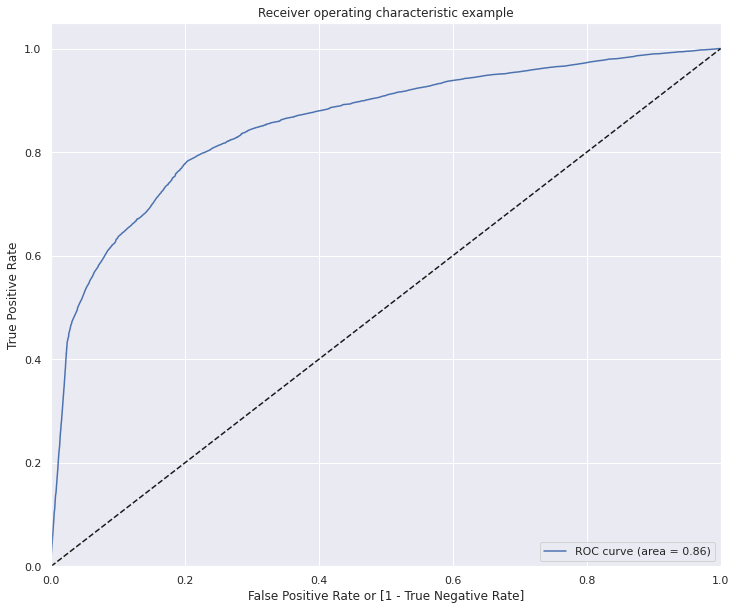

In [95]:
# Plot the ROC curve
draw_roc(y_val, p)

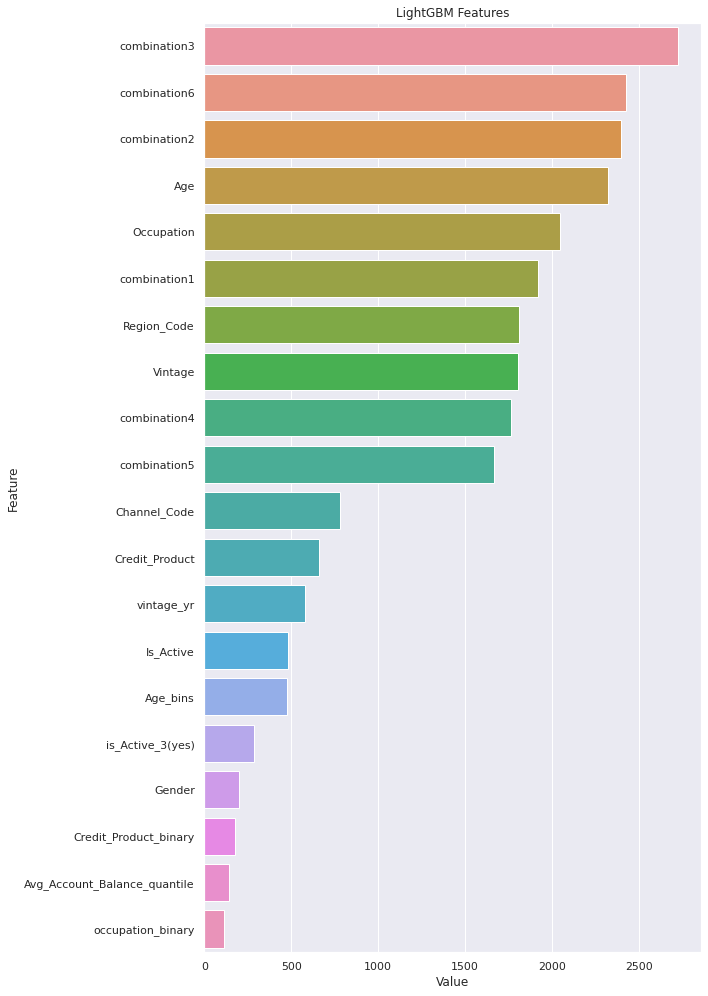

In [96]:
feature_imp = pd.DataFrame(sorted(zip(lgm.feature_importances_, X.columns), reverse=True)[:200], 
                           columns=['Value','Feature'])
plt.figure(figsize=(10,14))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [59]:
!pip install shap

     |████████████████████████████████| 358kB 24.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491631 sha256=14403cb63aa89c7e2c879bba28a11c876a036757302cb86fa57554c8f099e901
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


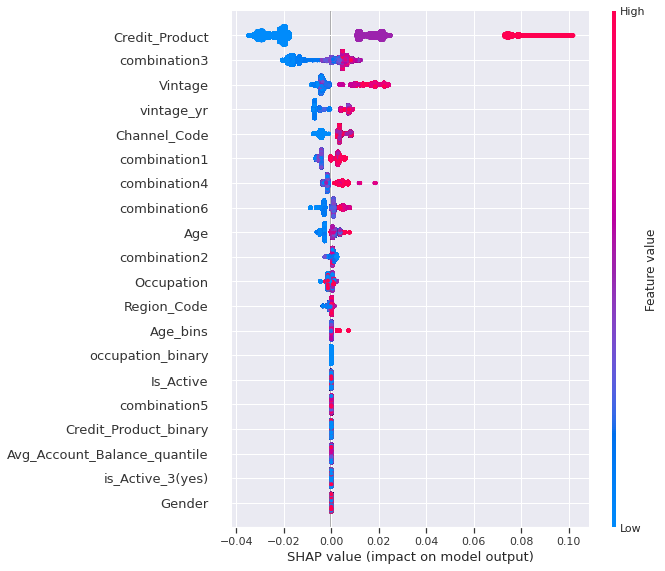

column_name shap_importance
6                 Credit_Product       0.0289531
16                  combination3      0.00823036
5                        Vintage      0.00697346
10                    vintage_yr      0.00654804
4                   Channel_Code      0.00455595
14                  combination1      0.00381459
17                  combination4      0.00309378
19                  combination6      0.00264961
1                            Age      0.00179721
15                  combination2     0.000947897
3                     Occupation      0.00092131
2                    Region_Code     0.000353417
8                       Age_bins     8.12726e-05
9              occupation_binary               0
11         Credit_Product_binary               0
12  Avg_Account_Balance_quantile               0
13              is_Active_3(yes)               0
7                      Is_Active               0
18                  combination5               0
0                         Gender               0

In [98]:
import shap
shap.initjs()

shap_values = shap.TreeExplainer(cb).shap_values(X)

shap.summary_plot(shap_values, X)


shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

In [ ]:
test_preds = m.predict_proba(test_scl, ntree_end=m.best_iteration_)[:,-1]

sub['Is_Lead'] = pd.Series(test_preds)
sub.to_csv('s_cb2.csv', index=False)

In [60]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, GroupShuffleSplit
fold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, val_index in fold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    m = CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=10)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200)
    
    preds = m.predict_proba(X_val,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_val, preds))
    err.append(roc_auc_score(y_val, preds))

0:	test: 0.8074189	test1: 0.8086865	best: 0.8086865 (0)	total: 161ms	remaining: 8m 1s
200:	test: 0.8680707	test1: 0.8681201	best: 0.8681256 (199)	total: 23s	remaining: 5m 20s
400:	test: 0.8758067	test1: 0.8741321	best: 0.8741321 (400)	total: 45.9s	remaining: 4m 57s
600:	test: 0.8789011	test1: 0.8743639	best: 0.8744103 (565)	total: 1m 9s	remaining: 4m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8744103265
bestIteration = 565

Shrink model to first 566 iterations.
err:  0.8744017139639201
0:	test: 0.8068078	test1: 0.8119398	best: 0.8119398 (0)	total: 107ms	remaining: 5m 20s
200:	test: 0.8670487	test1: 0.8716107	best: 0.8716135 (199)	total: 22.7s	remaining: 5m 16s
400:	test: 0.8753603	test1: 0.8780696	best: 0.8780735 (399)	total: 45.6s	remaining: 4m 55s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8781457519
bestIteration = 411

Shrink model to first 412 iterations.
err:  0.8781349975950673
0:	test: 0.8073735	test1: 0.8057256	best: 0.80

this gave 0.85237072

In [61]:
test_preds = m.predict_proba(test_scl, ntree_end=m.best_iteration_)[:,1]

sub['Is_Lead'] = pd.Series(test_preds)
sub.to_csv('s_cb4(best_continu).csv', index=False)

### XGB gridcv

In [62]:
# creating a KFold object 
folds = 4

# specify range of hyperparameters
param_grid = {'learning_rate': [0.01, 0.6, 0.9], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=8, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 42.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=8, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [63]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0     135.171465      0.624563  ...          0.882364         0.000381
1     151.270751      0.108219  ...          0.883146         0.000260
2     143.551272      1.089422  ...          0.882847         0.000159
3     127.296154      0.440140  ...          0.921122         0.000934
4     142.772329      0.462811  ...          0.957416         0.000756
5     127.993730      0.790059  ...          0.962817         0.000770
6     125.204743      0.766132  ...          0.895408         0.001907
7     144.894446      0.615403  ...          0.962432         0.000366
8     129.928871      0.626422  ...          0.975795         0.000346

[9 rows x 20 columns]

In [64]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.8723106184649777
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [65]:
model_cv.best_params_

{'learning_rate': 0.01, 'subsample': 0.6}

In [66]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
# params = {'learning_rate': 0.01,
#           'max_depth': 8, 
#           'n_estimators':200,
#           'subsample':0.6,
#          'objective':'binary:logistic'}

# fit model on training data
xgb_cv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)
xgb_cv.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [67]:
y_val_pred = xgb_cv.predict(X_val)
display_scores(y_val, y_val_pred)

F1 Score: 64.62%
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     18743
           1       0.81      0.54      0.65      5829

    accuracy                           0.86     24572
   macro avg       0.84      0.75      0.78     24572
weighted avg       0.85      0.86      0.85     24572



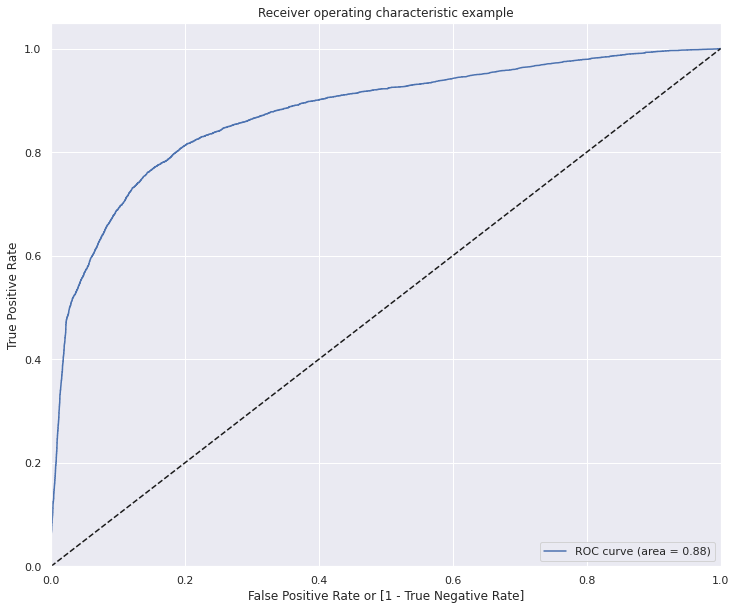

In [68]:
# Predicted probability
y_val_pred_proba = xgb_cv.predict_proba(X_val)[:,1]
# Plot the ROC curve
draw_roc(y_val, y_val_pred_proba)

In [69]:
test_preds = xgb_cv.predict_proba(test_scl)[:,1]
sub['Is_Lead'] = pd.Series(test_preds)
sub.to_csv('s_xb_cv3.csv', index=False)

# Dealing with imbalance Data

## Random Oversampling

In [70]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [71]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 168694, 1: 52459})
New class distribution:- Counter({0: 168694, 1: 168694})


### Decision Tree

In [146]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over, y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   15.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [147]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.87582533181057
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [148]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [149]:
# Predictions on the val set
y_val_pred = dt_over_model.predict(X_val)
display_scores(y_val, y_val_pred)

F1 Score: 66.51%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87     18743
           1       0.58      0.78      0.67      5829

    accuracy                           0.81     24572
   macro avg       0.75      0.80      0.77     24572
weighted avg       0.84      0.81      0.82     24572



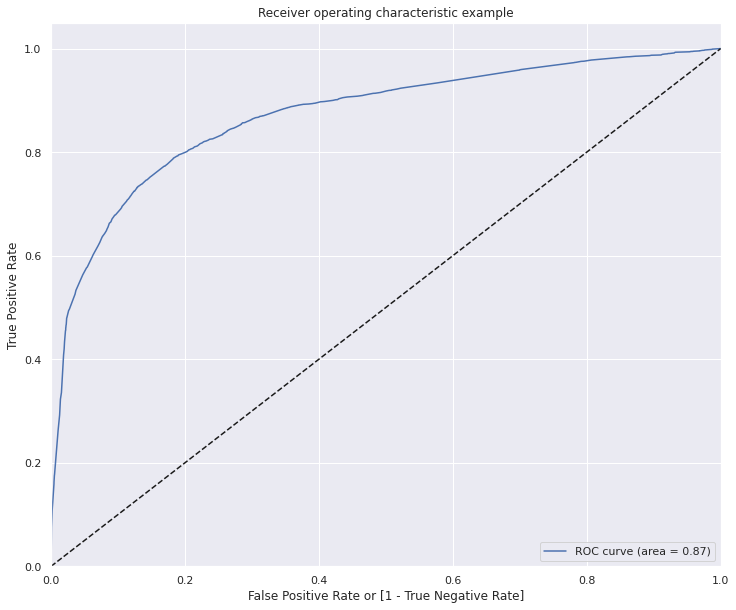

In [150]:
# Predicted probability
y_val_pred_proba = dt_over_model.predict_proba(X_val)[:,1]
# Plot the ROC curve
draw_roc(y_val, y_val_pred_proba)

### Xgboost

In [152]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=10, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 28.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [153]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0     177.702571      0.158273  ...          0.941550         0.002401
1     193.855589      0.761689  ...          0.950858         0.001417
2     171.274967      0.211973  ...          0.949831         0.001508
3     179.044271      0.138474  ...          0.956445         0.002963
4     196.774727      0.183036  ...          0.977355         0.001472
5     175.007733      0.540380  ...          0.981757         0.001261

[6 rows x 18 columns]

In [154]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9350012589513893
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [155]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [73]:
# chosen hyperparameters
params = {'learning_rate': 0.01,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.01, 'max_depth': 2,
                      'n_estimators': 200, 'objective': 'binary:logistic',
                      'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [74]:
# Predictions on the val set
y_val_pred = xgb_over_model.predict(X_val.to_numpy())

display_scores(y_val, y_val_pred)

F1 Score: 67.41%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.83      0.88     18743
           1       0.59      0.78      0.67      5829

    accuracy                           0.82     24572
   macro avg       0.76      0.81      0.78     24572
weighted avg       0.85      0.82      0.83     24572



In [75]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 79.91%
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81    168694
           1       0.82      0.78      0.80    168694

    accuracy                           0.80    337388
   macro avg       0.81      0.80      0.80    337388
weighted avg       0.81      0.80      0.80    337388



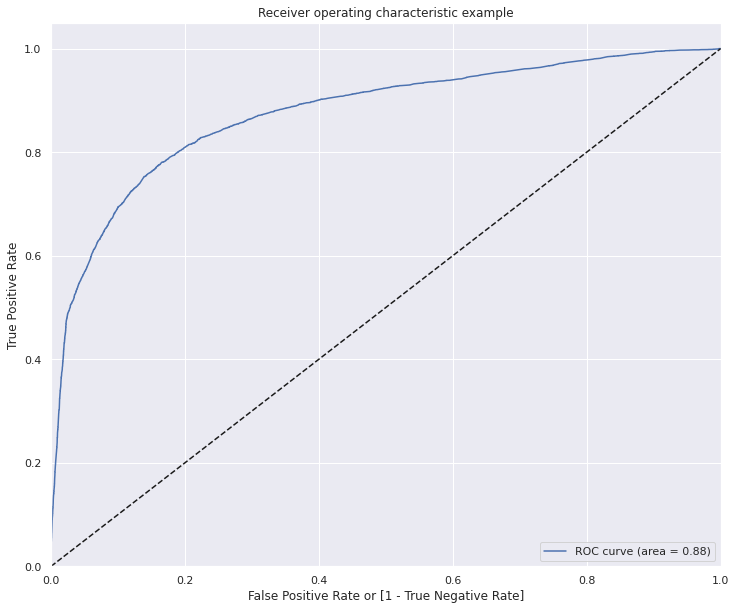

In [76]:
# Predicted probability
y_val_pred_proba = xgb_over_model.predict_proba(X_val.to_numpy())[:,1]
# Plot the ROC curve
draw_roc(y_val, y_val_pred_proba)

In [79]:
test_preds = xgb_over_model.predict_proba(test_scl.to_numpy())[:,1]
sub['Is_Lead'] = pd.Series(test_preds)
sub.to_csv('s_xb_(RS).csv', index=False)

### catboost

In [163]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, GroupShuffleSplit
fold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, val_index in fold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    m = CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=10)
    m.fit(X_over, y_over,eval_set=[(X_over, y_over),(X_val, y_val)], early_stopping_rounds=100,verbose=200)
    
    preds = m.predict_proba(X_val,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_val, preds))
    err.append(roc_auc_score(y_val, preds))

0:	test: 0.8031823	test1: 0.8054541	best: 0.8054541 (0)	total: 160ms	remaining: 7m 59s
200:	test: 0.8699101	test1: 0.8709928	best: 0.8709961 (199)	total: 30.5s	remaining: 7m 4s
400:	test: 0.8757950	test1: 0.8758903	best: 0.8758903 (400)	total: 1m 1s	remaining: 6m 37s
600:	test: 0.8795687	test1: 0.8790045	best: 0.8790045 (600)	total: 1m 32s	remaining: 6m 10s
800:	test: 0.8823645	test1: 0.8812966	best: 0.8812966 (800)	total: 2m 4s	remaining: 5m 41s
1000:	test: 0.8845692	test1: 0.8832992	best: 0.8832992 (1000)	total: 2m 35s	remaining: 5m 11s
1200:	test: 0.8865896	test1: 0.8851033	best: 0.8851033 (1200)	total: 3m 7s	remaining: 4m 40s
1400:	test: 0.8884657	test1: 0.8869410	best: 0.8869410 (1400)	total: 3m 38s	remaining: 4m 9s
1600:	test: 0.8901904	test1: 0.8883752	best: 0.8883752 (1600)	total: 4m 10s	remaining: 3m 38s
1800:	test: 0.8917904	test1: 0.8898258	best: 0.8898258 (1800)	total: 4m 41s	remaining: 3m 7s
2000:	test: 0.8932595	test1: 0.8912204	best: 0.8912204 (2000)	total: 5m 13s	remain

In [164]:
test_preds = m.predict_proba(test_scl, ntree_end=m.best_iteration_)[:,-1]

sub['Is_Lead'] = pd.Series(test_preds)
sub.to_csv('s_cb3.csv', index=False)

### Stacked Ensemble

In [ ]:
# !pip install sklearn2pmml

In [214]:
from sklearn_pandas import DataFrameMapper
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn2pmml.decoration import CategoricalDomain, ContinuousDomain
from sklearn2pmml.pipeline import PMMLPipeline

from sklearn_pandas import DataFrameMapper
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn2pmml.pipeline import PMMLPipeline

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [223]:
estimators = [
              ("LGBM", LGBMClassifier(n_estimators = 31, max_depth = 3, random_state = 13)),
              ("XGB", XGBClassifier(n_estimators = 31, max_depth = 3, random_state = 13))
]
clf = StackingClassifier(
                          estimators=estimators, final_estimator=XGBClassifier()
)
clf.fit(X_over, y_over).score(X_val.to_numpy(), y_val)

0.8073416897281459

In [229]:
test_preds = clf.predict_proba(test_scl.to_numpy())[:,-1]

sub['Is_Lead'] = pd.Series(test_preds)
sub.to_csv('clf_stacked.csv', index=False)

## SMOTE (Synthetic Minority Oversampling Technique)

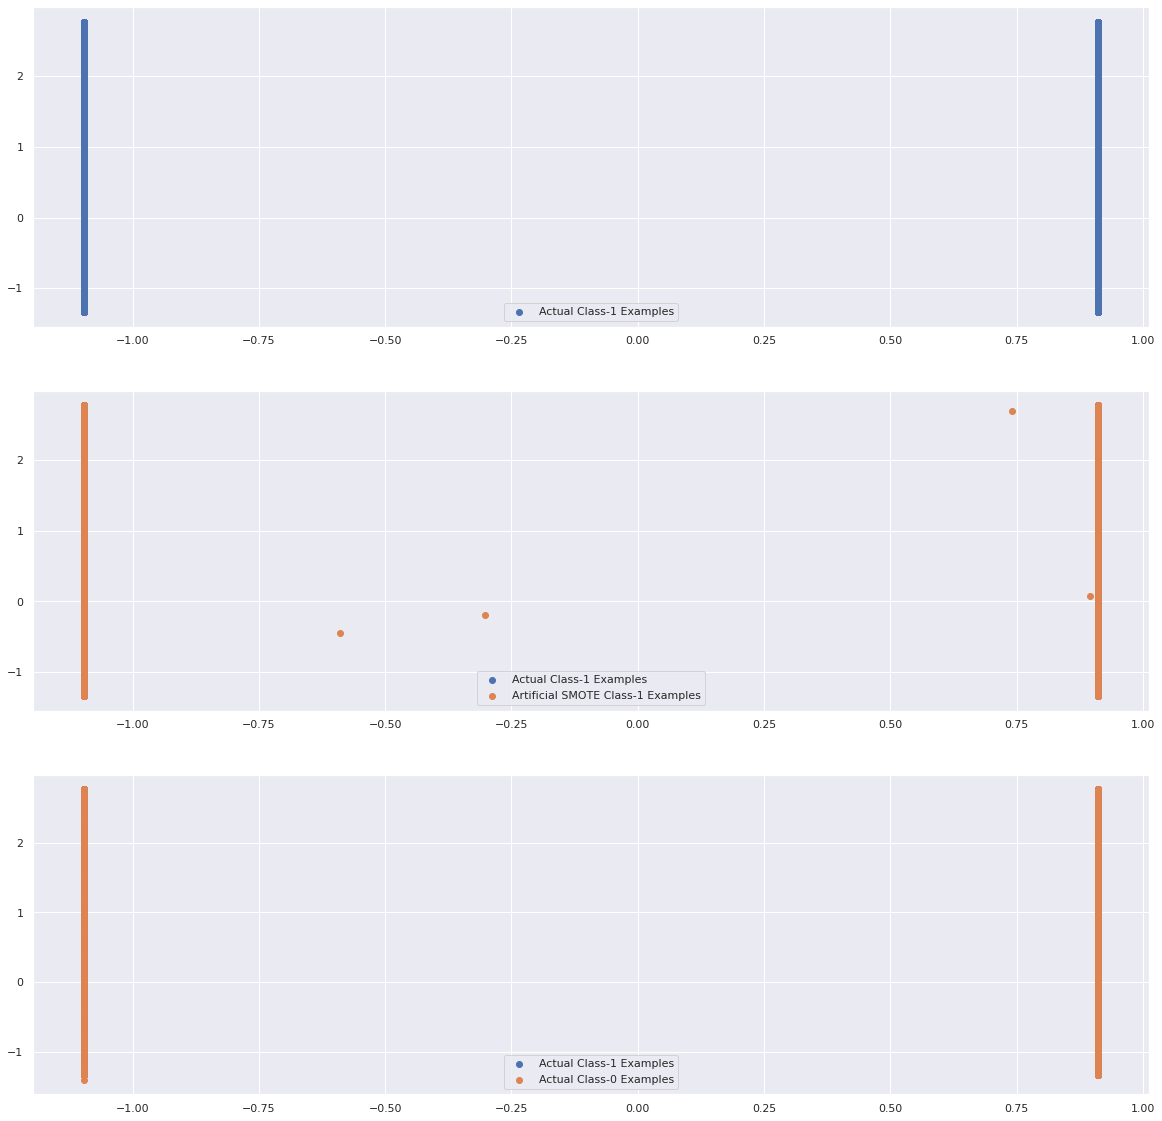

In [166]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Decision Tree SMOTE

In [168]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   21.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [171]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.8882911056444649
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [172]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [173]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

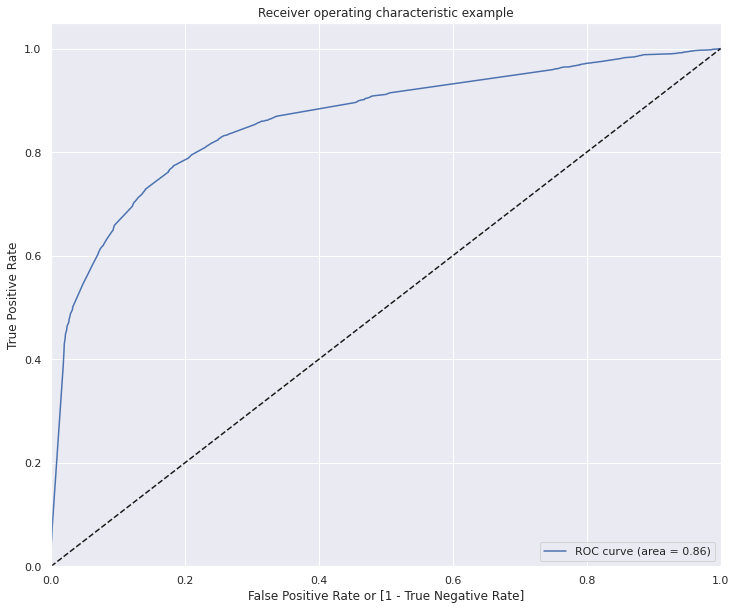

In [175]:
# Predicted probability
y_val_pred_smote = dt_smote_model.predict_proba(X_val)[:,1]
# Plot the ROC curve
draw_roc(y_val, y_val_pred_smote)

### xgboost SMOTE

In [177]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [178]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0      18.487444      0.110450  ...          0.910435         0.019957
1      20.758753      0.204009  ...          0.909953         0.019264
2      19.501824      0.396119  ...          0.909807         0.018801
3      18.354543      0.225732  ...          0.939495         0.029303
4      20.786181      0.199218  ...          0.939907         0.027937
5      19.207680      0.682407  ...          0.941128         0.028801

[6 rows x 18 columns]

In [179]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9292754712948273
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [180]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [181]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

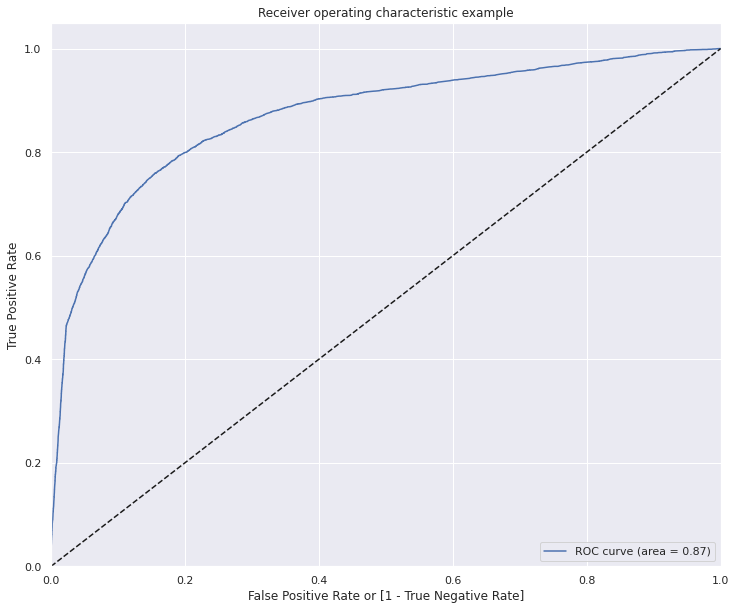

In [183]:
# Predicted probability
y_val_pred_smote = xgb_smote_model.predict_proba(X_val.to_numpy())[:,1]
# Plot the ROC curve
draw_roc(y_val, y_val_pred_smote)

### Catboost SMOTE

In [201]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, GroupShuffleSplit
fold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, val_index in fold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    m = CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=10)
    m.fit(X_train_smote, y_train_smote,eval_set=[(X_train_smote, y_train_smote),(X_val, y_val)], early_stopping_rounds=100,verbose=200)
    
    preds = m.predict_proba(X_val,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_val, preds))
    err.append(roc_auc_score(y_val, preds))

0:	test: 0.7126821	test1: 0.7089056	best: 0.7089056 (0)	total: 139ms	remaining: 6m 58s
200:	test: 0.8748408	test1: 0.8714578	best: 0.8714579 (198)	total: 31.9s	remaining: 7m 24s
400:	test: 0.9249900	test1: 0.8732280	best: 0.8733924 (311)	total: 1m 3s	remaining: 6m 53s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8733923946
bestIteration = 311

Shrink model to first 312 iterations.
err:  0.8733889806709898
0:	test: 0.7126821	test1: 0.7146408	best: 0.7146408 (0)	total: 132ms	remaining: 6m 35s
200:	test: 0.8748408	test1: 0.8761317	best: 0.8761317 (200)	total: 32s	remaining: 7m 25s
400:	test: 0.9249900	test1: 0.8780998	best: 0.8783035 (380)	total: 1m 3s	remaining: 6m 53s
600:	test: 0.9502825	test1: 0.8795304	best: 0.8795611 (591)	total: 1m 35s	remaining: 6m 22s
800:	test: 0.9555141	test1: 0.8805181	best: 0.8805259 (799)	total: 2m 7s	remaining: 5m 49s
1000:	test: 0.9574056	test1: 0.8814556	best: 0.8814563 (997)	total: 2m 38s	remaining: 5m 17s
1200:	test: 0.9585654	te

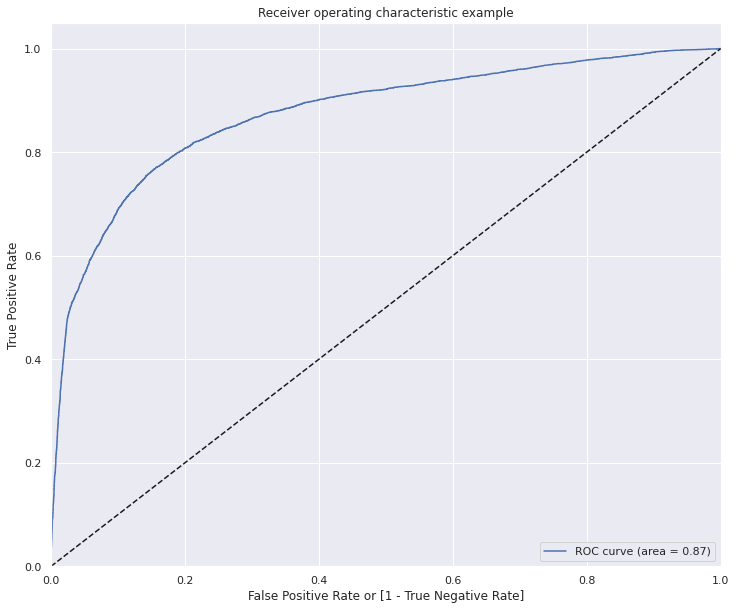

In [202]:
# Predicted probability
y_val_pred_smote = m.predict_proba(X_val)[:,1]
# Plot the ROC curve
draw_roc(y_val, y_val_pred_smote)

In [203]:
test_preds = m.predict_proba(test_scl, ntree_end=m.best_iteration_)[:,-1]

sub['Is_Lead'] = pd.Series(test_preds)
sub.to_csv('s_cb_smte.csv', index=False)

### LightGM classifier SMOTE

In [204]:
m = LGBMClassifier(n_estimators=5000,
                   random_state=1994,
                   learning_rate=0.05,
                   colsample_bytree=0.5,
                   reg_alpha=4,
                   min_split_gain=0.2,
                   min_child_samples=2,
                   bagging_fraction=0.9,
                   max_depth=-1)

m.fit(X_train_smote, y_train_smote, eval_set=[(X_val, y_val)], eval_metric='AUC', early_stopping_rounds=200, verbose=200)
p = m.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val, p))

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.353702	valid_0's auc: 0.875424
[400]	valid_0's binary_logloss: 0.345889	valid_0's auc: 0.875423
Early stopping, best iteration is:
[320]	valid_0's binary_logloss: 0.347418	valid_0's auc: 0.875534
0.875533654941134


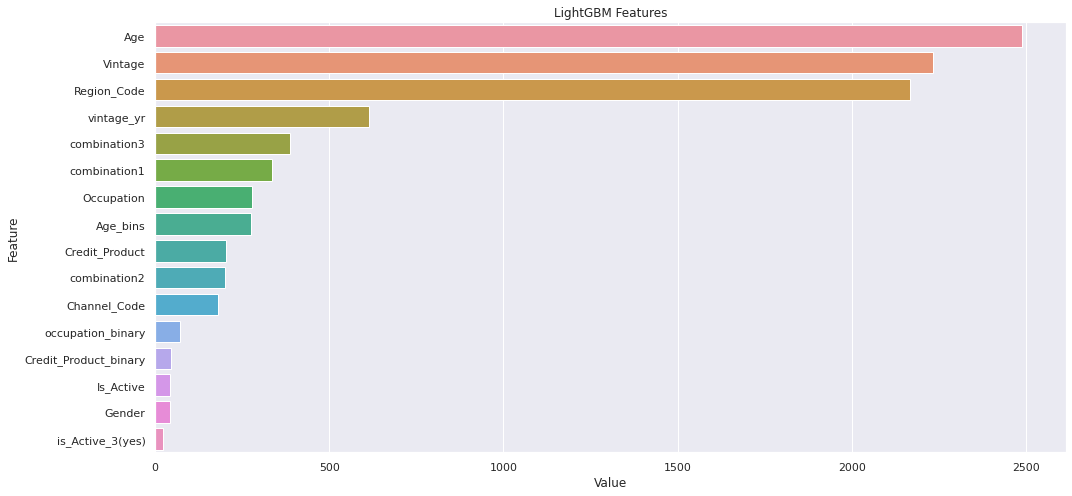

In [206]:
feature_imp = pd.DataFrame(sorted(zip(m.feature_importances_, X.columns), reverse=True)[:200], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,7))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

## ADASYN (Adaptive Synthetic Sampling)

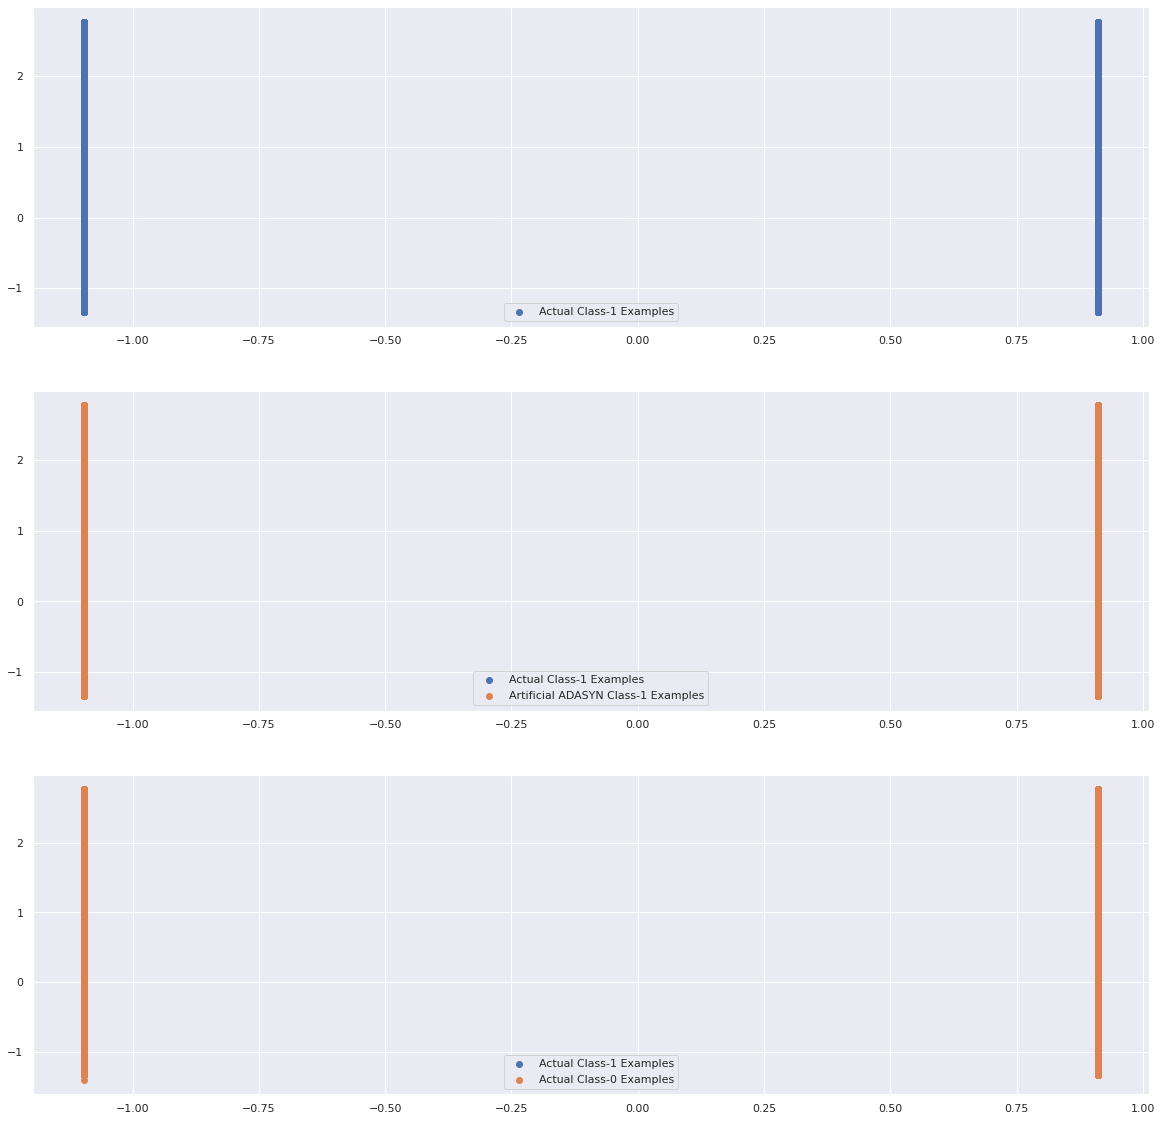

In [185]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Decision Tree ADASYN

In [186]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   39.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [187]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.8411111174172612
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [188]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

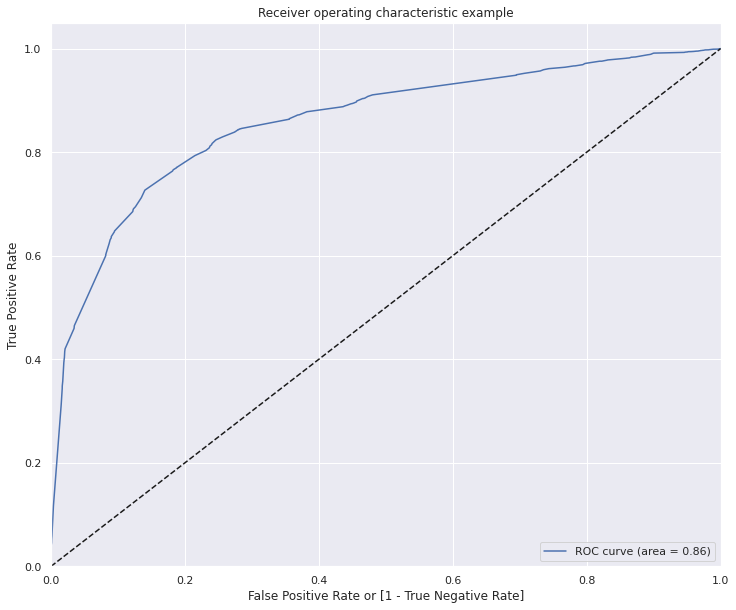

In [189]:
# Predicted probability
y_val_pred_proba = dt_adasyn_model.predict_proba(X_val)[:,1]
# Plot the ROC curve
draw_roc(y_val, y_val_pred_proba)

### Xgboost ADASYN

In [191]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [192]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0      35.140637      0.270117  ...          0.915989         0.026882
1      39.738227      0.421557  ...          0.916788         0.028273
2      37.012457      0.736776  ...          0.915262         0.026619
3      35.139285      0.354886  ...          0.945476         0.032174
4      40.012212      0.426236  ...          0.947303         0.031246
5      36.824012      0.985139  ...          0.948442         0.031173

[6 rows x 18 columns]

In [193]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9316616636850036
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [194]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [195]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

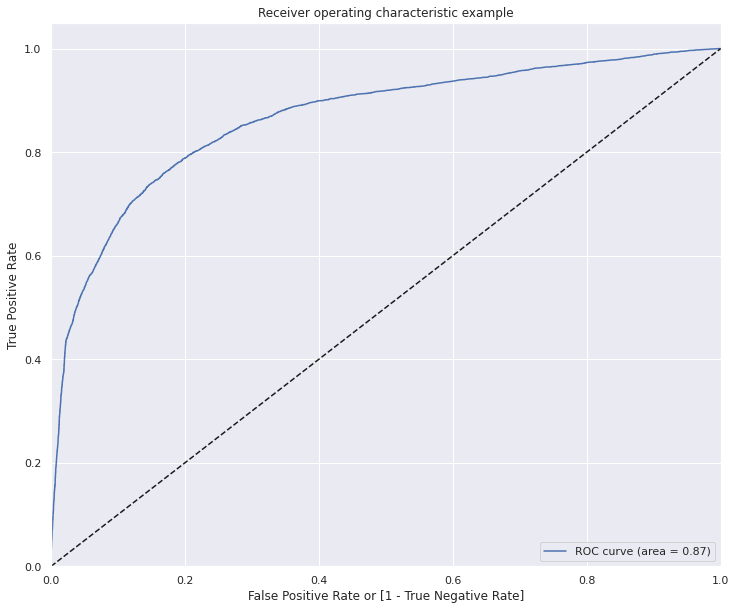

In [196]:
# Predicted probability
y_test_val_proba = xgb_adasyn_model.predict_proba(X_val.to_numpy())[:,1]
# Plot the ROC curve
draw_roc(y_val, y_test_val_proba)

### Catboost ADASYN

In [197]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, GroupShuffleSplit
fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)
for train_index, val_index in fold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    m = CatBoostClassifier(n_estimators=1000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=10)
    m.fit(X_train_adasyn, y_train_adasyn,eval_set=[(X_train_adasyn, y_train_adasyn),(X_val, y_val)], early_stopping_rounds=100,verbose=200)
    
    preds = m.predict_proba(X_val,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_val, preds))
    err.append(roc_auc_score(y_val, preds))

0:	test: 0.7600340	test1: 0.8183181	best: 0.8183181 (0)	total: 152ms	remaining: 2m 32s
200:	test: 0.8083046	test1: 0.8743895	best: 0.8743895 (200)	total: 32.3s	remaining: 2m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8760241829
bestIteration = 297

Shrink model to first 298 iterations.
err:  0.8760192035006434
0:	test: 0.7600340	test1: 0.8117445	best: 0.8117445 (0)	total: 148ms	remaining: 2m 27s
200:	test: 0.8083046	test1: 0.8685024	best: 0.8685024 (200)	total: 32.3s	remaining: 2m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8704802465
bestIteration = 297

Shrink model to first 298 iterations.
err:  0.8704658848756741
0:	test: 0.7600340	test1: 0.8175524	best: 0.8175524 (0)	total: 139ms	remaining: 2m 18s
200:	test: 0.8083046	test1: 0.8715496	best: 0.8715513 (199)	total: 32.3s	remaining: 2m 8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8730213173
bestIteration = 297

Shrink model to first 298 iterations.
er

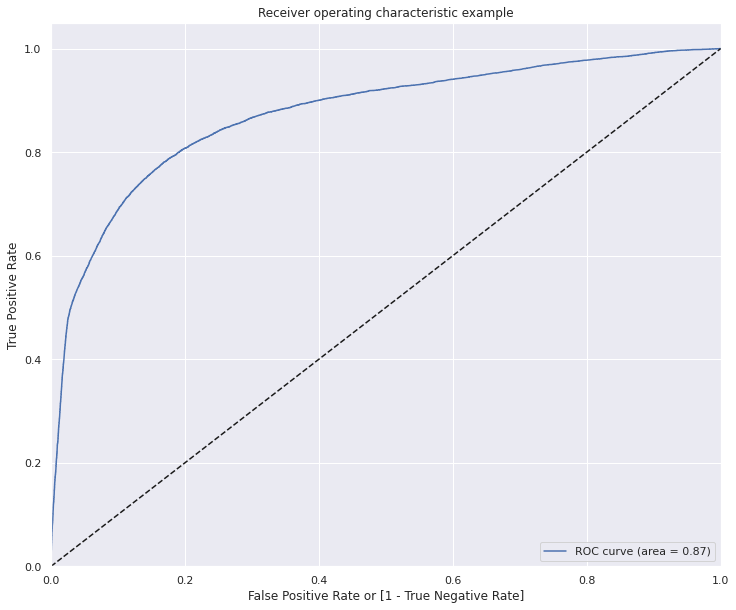

In [198]:
val_preds = m.predict_proba(X_val, ntree_end=m.best_iteration_)[:,-1]
# Plot the ROC curve
draw_roc(y_val, val_preds)